## COMP5721M: Programming for Data Science

## Group project (Coursework 2): Data Analysis Project


**_Investigating local and regional GHG emissions in the UK in 2022_**


_Give names and emails of group members here:_

* Removed for anonymity

# Project Plan

## The Data

The dataset set used for this project is from the UK Government and is available on the data.gov.uk open data repository. It was published by the Department for Energy Security and Net Zero on 27 June 2024. The dataset is classified as Accredited Official Statistics, indicating it has been assessed and complies with the standards of the Office for Statistics Regulation, ensuring the data’s credibility and accuracy. The dataset is updated every year to reflect the latest data available.

The data derives from the UK Greenhouse Gas Inventory (GHGI) and incorporates data from five main sources:
* The Department for Energy Security and Net Zero sub-national gas and
electricity consumption statistics.
* Devolved Administration organizations: EA, NRW, SEPA, DAERA.
* Point source emissions from large industrial installations.
*  High resolution emissions distribution mapping data developed under the
NAEI programme.
* Land use, land-use change and forestry (LULUCF) regional data supplied by
The UK Centre for Ecology & Hydrology (UKCEH), under the NAEI
Programme.

The dataset presents greenhouse gas (GHG) emissions estimates by sector, for each local authority in the UK, from 2005 to 2022. The gases included are carbon dioxide (CO2), methane (CH4) and nitrous oxide (N2O). Emissions are allocated to sectors and sub-sectors within each local authority, based on fuel and electricity consumption. Using an end-user approach, emissions from fuel production were reallocated to consumers, to reflect the emissions related to energy use rather than production. The transport sector emissions excluded aviation, shipping and military transport as these cannot be allocated to local areas. Moreover, mid-year population, derived from census data and dynamic population models, as well as area of the local authority were provided.

The original data set consists of 533 018 rows and 15 columns, covering 4 countries, 12 regions, 361 local authorities and 8 sectors. For the purpose of this study, the data was cleaned to focus on emissions in 2022 only. The three types of GHGs were combined into a single total GHG emissions figure. Sub-sectors and unallocated emissions were excluded. Thus, the cleaned final dataset used for analysis contains 2888 rows and 13 columns.


## Project Aim and Objectives

The aim of this project is to investigate greenhouse gas (GHG) emissions at the local and regional levels within the United Kingdom in 2022. This study focuses on understanding the spatial distribution of emissions and identifying major emission sources across different sectors. Results could provide valuable insights into emissions patterns and drivers, helping to develop mitigation strategies in regions and sectors with high environmental impacts.

To achieve this aim, GHG data is analysed across different scales - national, regional and local authority levels. Emissions are also broken down by sector, to detect the activities contributing the most to GHG emissions, highlighting areas for potential policy intervention.

The project is structured around four main objectives, each of which investigates a specific aspect of UK GHG emissions in 2022.


### **Objectives**

**Objective 1: Compare GHG emissions across countries and regions**

This objective involves comparing annual total GHG emissions across UK countries and regions. Countries and regions are also compared statistically with the average GHG emissions of local authorities within them, in order to standardize for differences in size.

**Objective 2: Identify top and lowest polluting local authorities (LAs)**

This objective aims to compare total GHG emissions across different local authorities. The analysis examines whether different local authorities have significant variance in GHG emissions overall, and compares the highest and lowest polluting local authorities by sector.


**Objective 3: Compare GHG emissions by sector, identifying regional patterns**

This objective focuses on comparing emissions across sectors to identify major contributors, and uncover regional patterns related to emissions.

**Objective 4: Analyse distributions and correlations between emissions, area size, population and population density**

By examining correlations between emissions and factors like area, population and population density, this objective aims to  understand how the attributes of a local authority relate to its greenhouse gas emissions.


## System Design

### Architecture

The code architecture, shown in the diagram, involves several processing stages: data cleaning/wrangling, analysis, and visualisation to yield useful results. Initially, the csv data is read into python and stored as a pandas dataframe. Irrelevant data (all years but 2022 and sub-sector data) was removed. A population density column was calculated, enriching the data, and the data was restructured, aggregating greenhouse gases into a single column and selecting only the variables that are of interest. The cleaned data was then analysed, which involved carrying out statistical tests and calculating summary data to gain insights, followed by visualisation in various formats to explore differences and relationships further.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


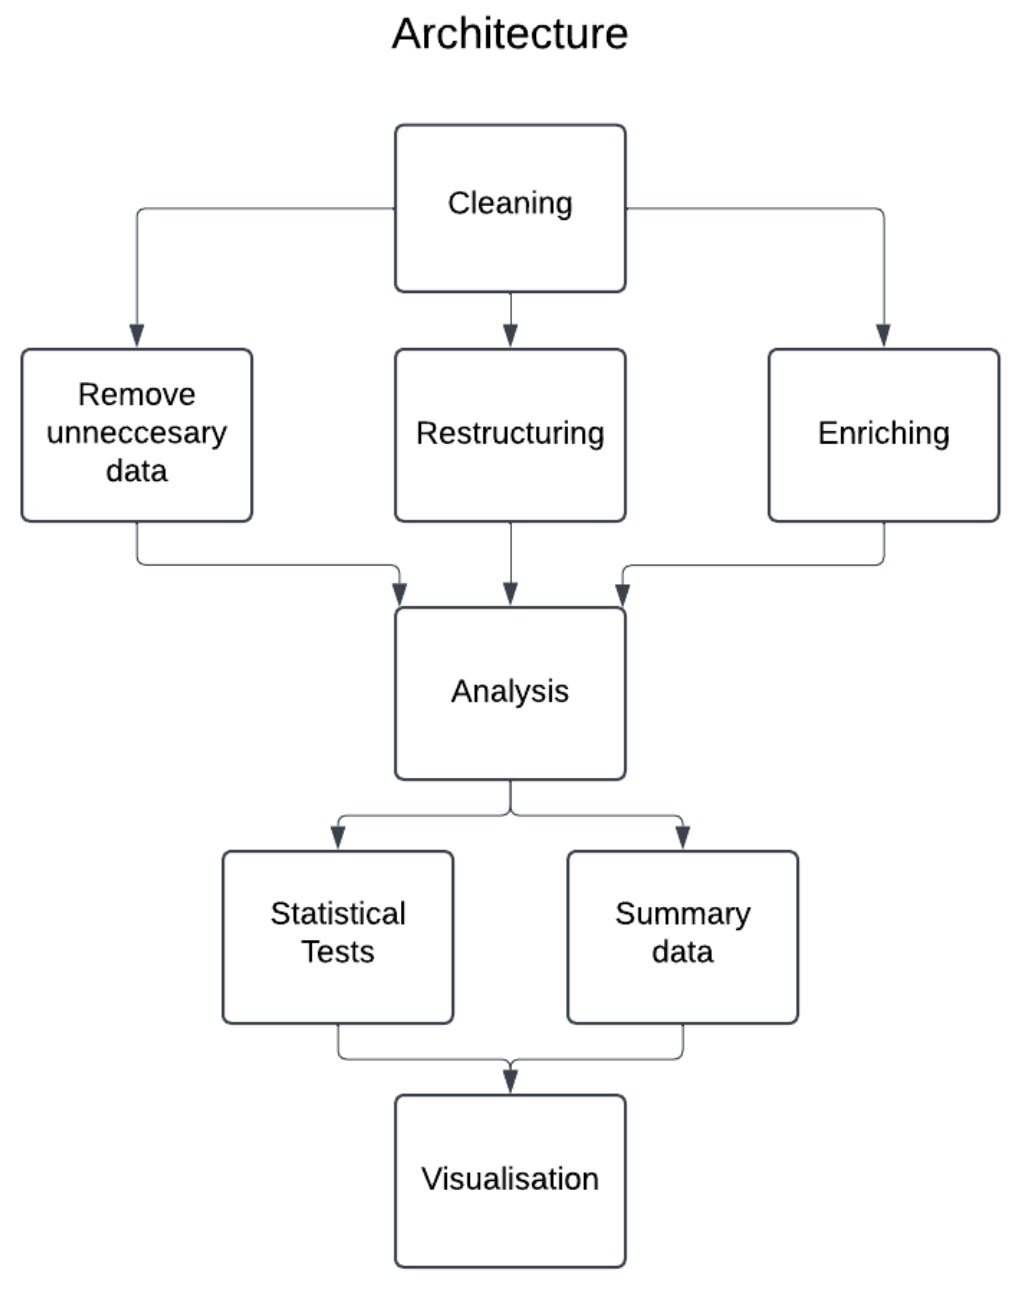

In [ ]:
#Import package
from PIL import Image

# Open the image
Image.open("Image Archi.jpeg")

### Processing Modules and Algorithms

**Cleaning:**

* Keep 2022 data only, exclude other years
* Exclude unnecessary column (CO2 emissions within the scope of influence of LAs (kt CO2) and sub-sectors)
* Group emissions by sector, excluding sub-sectors
* Sum up 3 types of emissions (CO2, NO2 and CH4) into a single total GHG variable
* Create a population density variable column
* Exclude unallocated data / missing values
* Save the new dataset for analysis

**Objective 1**

* Gain insights from calculating total annual GHG emissions of countries and regions
* Visualise data with barcharts
* Use Shapiro-Wilk to test for normality
* Use Kruskal-Wallis statistical tests to investigate significant differences in average local authority GHG emissions between countries and between regions
* Use Dunn’s tests (post hoc nonparametric test) to determine which countries/regions means differ
* Summarise the data to gain insights from country and region group means
* Visualise data with boxplots
* Visualise data with maps

**Objective 2**

* Use Kruskal–Wallis test to test for differences between the highest emitting local authorities, lowest emitting local authorities and rest of data
* Use Dunn's test to determine whether lowest or highest emitters differ most from the rest of the dataframe
* Summarise mean emissions of individual local authorities by sector and  across all sectors
* Visualise the highest and lowest emitting local authorities, as well as their emissions by sectors using bar charts
* Visualise total local authority emissions with a map

**Objective 3**
* Ensure only sector and relevant variables are selected for analysis
* Summarise percentage, total and mean emissions contributions by sector
* Use Shapiro-Wilk test to identify if there is normal distribution in the data
* Utilise Kruskal-Wallis test to identify differences between the sectors, followed by Dunn’s test to clearly see which sectors differ from one another
* Visualise analysis using bar charts and heatmaps to make patterns easier to interpret

**Objective 4**

* Clean data again such that each row represents a unique local authority with area and population values, removing the breakdown of sectors to align the data with the requirements of the subsequent analyses
* Remove outliers to aid the data visualisation and analysis
* Visualise algorithms to display histograms, boxplots and scatter plots using seaborn and matplotlib to visualise distributions of and relationships between data
* Calculate the skewness and kurtosis of variables to understand their distribution
* Perform Anderson-Darling Test for normality on variables to understand the distribution.
* Perform log transformation on data to reduce skewness in an attempt to normalise.
* Carry out a Spearman Rank correlation test using scipy to test the relationship between GHG emissions and another variable (area, population or population density)
* Visualise algorithms to display histogram and scatter plots using seaborn and matplotlib to visualise relationships within and between data



# Program Code

In [ ]:
#Import packages
import pandas as pd #importing pandas
pd.options.mode.chained_assignment = None #turns off some error messages
import matplotlib.pyplot as plt #import matplotlib's pyplot interface, nicknamed plt
import seaborn as sns #for some smarter visualisations, nicknamed sns
import numpy as np #adding a numerical module
import math #adding the maths module
import scipy.stats as stats
from scipy.stats import f_oneway, shapiro, mannwhitneyu #importing one-way ANOVA test, Shapiro-Wilk test, Mann-Whitney U test
import geopandas as gpd #importing geopandas for geospatial visualisation

## **Data Cleaning**

In [ ]:
#Load in the data from csv file
df = pd.read_csv('2005-2022-local-authority-ghg-emissions-csv-dataset.csv')

In [ ]:
#Visualize data
df.head()

Country Country Code      Region Region Code Second Tier Authority  \
0  England    E92000001  North East   E12000001            Hartlepool   
1  England    E92000001  North East   E12000001            Hartlepool   
2  England    E92000001  North East   E12000001            Hartlepool   
3  England    E92000001  North East   E12000001            Hartlepool   
4  England    E92000001  North East   E12000001            Hartlepool   

  Local Authority Local Authority Code  Calendar Year LA GHG Sector  \
0      Hartlepool            E06000001           2005   Agriculture   
1      Hartlepool            E06000001           2005   Agriculture   
2      Hartlepool            E06000001           2005   Agriculture   
3      Hartlepool            E06000001           2005   Agriculture   
4      Hartlepool            E06000001           2005   Agriculture   

         LA GHG Sub-sector Greenhouse gas  Territorial emissions (kt CO2e)  \
0  Agriculture Electricity            CO2                         1.678178   
1  Agriculture Electricity            CH4                         0.052700   
2  Agriculture Electricity            N2O                         0.006770   
3          Agriculture Gas            CO2                         0.311375   
4          Agriculture Gas            CH4                         0.010500   

   CO2 emissions within the scope of influence of LAs (kt CO2)  \
0                                           1.678178             
1                                           0.000000             
2                                           0.000000             
3                                           0.311375             
4                                           0.000000             

   Mid-year Population (thousands)  Area (km2)  
0                           90.457     98.3466  
1                           90.457     98.3466  
2                           90.457     98.3466  
3                           90.457     98.3466  
4                           90.457     98.3466

In [ ]:
#Get main information from dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 533016 entries, 0 to 533015
Data columns (total 15 columns):
 #   Column                                                       Non-Null Count   Dtype  
---  ------                                                       --------------   -----  
 0   Country                                                      533016 non-null  object 
 1   Country Code                                                 532602 non-null  object 
 2   Region                                                       533016 non-null  object 
 3   Region Code                                                  532602 non-null  object 
 4   Second Tier Authority                                        532602 non-null  object 
 5   Local Authority                                              533016 non-null  object 
 6   Local Authority Code                                         533016 non-null  object 
 7   Calendar Year                                                5330

To simplify analysis, the dataset was filtered to include only data from the year 2022.

In [ ]:
#Check how many rows are in 2022
df['Calendar Year'].value_counts()
#Result: Have 29623 rows in 2022

Calendar Year
2008    30140
2007    29843
2006    29837
2005    29780
2022    29623
2018    29603
2019    29564
2021    29551
2020    29548
2016    29542
2017    29541
2015    29521
2010    29506
2011    29499
2014    29498
2013    29492
2012    29472
2009    29456
Name: count, dtype: int64

In [ ]:
#Create sub-set keeping only the 2022 data, excluding all other years
GHG_2022 = df[(df['Calendar Year'] == 2022)]

In [ ]:
#Check we have 29623 rows in new 2022 sub-set
GHG_2022.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29623 entries, 1382 to 533015
Data columns (total 15 columns):
 #   Column                                                       Non-Null Count  Dtype  
---  ------                                                       --------------  -----  
 0   Country                                                      29623 non-null  object 
 1   Country Code                                                 29600 non-null  object 
 2   Region                                                       29623 non-null  object 
 3   Region Code                                                  29600 non-null  object 
 4   Second Tier Authority                                        29600 non-null  object 
 5   Local Authority                                              29623 non-null  object 
 6   Local Authority Code                                         29623 non-null  object 
 7   Calendar Year                                                29623 non-null  

The columns 'CO2 emissions within the scope of influence of LAs (kt CO2)' and 'LA GHG Sub-sector' were excluded from the dataset as they are irrelevant to the analysis.

In [ ]:
#Drop 2 columns not used in analysis
#Drop CO2 emissions within the scope of influence of LAs (kt CO2)
#Drop LA GHG Sub-sector
GHG_2022 = GHG_2022.drop(['CO2 emissions within the scope of influence of LAs (kt CO2)', 'LA GHG Sub-sector'], axis=1)

In [ ]:
#Check
GHG_2022.head()

Country Country Code      Region Region Code Second Tier Authority  \
1382  England    E92000001  North East   E12000001            Hartlepool   
1383  England    E92000001  North East   E12000001            Hartlepool   
1384  England    E92000001  North East   E12000001            Hartlepool   
1385  England    E92000001  North East   E12000001            Hartlepool   
1386  England    E92000001  North East   E12000001            Hartlepool   

     Local Authority Local Authority Code  Calendar Year LA GHG Sector  \
1382      Hartlepool            E06000001           2022   Agriculture   
1383      Hartlepool            E06000001           2022   Agriculture   
1384      Hartlepool            E06000001           2022   Agriculture   
1385      Hartlepool            E06000001           2022   Agriculture   
1386      Hartlepool            E06000001           2022   Agriculture   

     Greenhouse gas  Territorial emissions (kt CO2e)  \
1382            CO2                         0.390443   
1383            CH4                         0.010700   
1384            N2O                         0.002320   
1385            CO2                         0.054500   
1386            CH4                         0.001420   

      Mid-year Population (thousands)  Area (km2)  
1382                           93.861     98.3466  
1383                           93.861     98.3466  
1384                           93.861     98.3466  
1385                           93.861     98.3466  
1386                           93.861     98.3466

The data should be grouped by 'LA GHG Sector,' and the sum of 'Territorial emissions (kt CO2e)' should be calculated. This process generates a new variable for total GHG emissions by combining CO2, CH4, and NO2 emissions, representing the aggregate emissions per sector within each Local Authority.

In [ ]:
#Group by LA GHG Sector and sum Territorial emissions (kt CO2e)
#Creates a total GHG emissions variable  (sums up CO2 , CH4 and NO2 emissions)
#i.e. sum of emissions per sector within each Local Authority
GHG_sector1 = GHG_2022.groupby(['Local Authority', 'LA GHG Sector'])['Territorial emissions (kt CO2e)'].sum().reset_index()

In [ ]:
#Rename total emissions column
GHG_sector1 = GHG_sector1.rename(columns={'Territorial emissions (kt CO2e)': 'Total_GHG_emissions_kt'})
GHG_sector1.head()

Local Authority LA GHG Sector  Total_GHG_emissions_kt
0   Aberdeen City   Agriculture               28.361264
1   Aberdeen City    Commercial              189.714713
2   Aberdeen City      Domestic              303.880215
3   Aberdeen City      Industry              136.504676
4   Aberdeen City        LULUCF               30.933170

In [ ]:
# Create new dataset containing additional information from the original dataset
# We need to get the first occurrence of these for each group
# Use 'first()' aggregation
additional_info = GHG_2022.groupby(['Local Authority', 'LA GHG Sector']).agg({
    'Country': 'first',
    'Country Code': 'first',
    'Region': 'first',
    'Region Code': 'first',
    'Second Tier Authority': 'first',
    'Local Authority Code': 'first',
    'Calendar Year': 'first',
    'Mid-year Population (thousands)': 'first',
    'Area (km2)': 'first'
}).reset_index()

In [ ]:
#Merge the GHG_sector1 with additional_info
GHG_sector2 = GHG_sector1.merge(additional_info, on=['Local Authority', 'LA GHG Sector'], how='left')

# Display
GHG_sector2.head(15)

Local Authority  LA GHG Sector  Total_GHG_emissions_kt   Country  \
0    Aberdeen City    Agriculture               28.361264  Scotland   
1    Aberdeen City     Commercial              189.714713  Scotland   
2    Aberdeen City       Domestic              303.880215  Scotland   
3    Aberdeen City       Industry              136.504676  Scotland   
4    Aberdeen City         LULUCF               30.933170  Scotland   
5    Aberdeen City  Public Sector               82.790485  Scotland   
6    Aberdeen City      Transport              346.218381  Scotland   
7    Aberdeen City          Waste               46.458914  Scotland   
8    Aberdeenshire    Agriculture             1080.827389  Scotland   
9    Aberdeenshire     Commercial               93.241896  Scotland   
10   Aberdeenshire       Domestic              434.721383  Scotland   
11   Aberdeenshire       Industry              130.805148  Scotland   
12   Aberdeenshire         LULUCF              322.999820  Scotland   
13   Aberdeenshire  Public Sector               29.643178  Scotland   
14   Aberdeenshire      Transport              602.766207  Scotland   

   Country Code    Region Region Code Second Tier Authority  \
0     S92000003  Scotland   S92000003              Scotland   
1     S92000003  Scotland   S92000003              Scotland   
2     S92000003  Scotland   S92000003              Scotland   
3     S92000003  Scotland   S92000003              Scotland   
4     S92000003  Scotland   S92000003              Scotland   
5     S92000003  Scotland   S92000003              Scotland   
6     S92000003  Scotland   S92000003              Scotland   
7     S92000003  Scotland   S92000003              Scotland   
8     S92000003  Scotland   S92000003              Scotland   
9     S92000003  Scotland   S92000003              Scotland   
10    S92000003  Scotland   S92000003              Scotland   
11    S92000003  Scotland   S92000003              Scotland   
12    S92000003  Scotland   S92000003              Scotland   
13    S92000003  Scotland   S92000003              Scotland   
14    S92000003  Scotland   S92000003              Scotland   

   Local Authority Code  Calendar Year  Mid-year Population (thousands)  \
0             S12000033           2022                           224.19   
1             S12000033           2022                           224.19   
2             S12000033           2022                           224.19   
3             S12000033           2022                           224.19   
4             S12000033           2022                           224.19   
5             S12000033           2022                           224.19   
6             S12000033           2022                           224.19   
7             S12000033           2022                           224.19   
8             S12000034           2022                           263.75   
9             S12000034           2022                           263.75   
10            S12000034           2022                           263.75   
11            S12000034           2022                           263.75   
12            S12000034           2022                           263.75   
13            S12000034           2022                           263.75   
14            S12000034           2022                           263.75   

    Area (km2)  
0     205.6013  
1     205.6013  
2     205.6013  
3     205.6013  
4     205.6013  
5     205.6013  
6     205.6013  
7     205.6013  
8    6338.1488  
9    6338.1488  
10   6338.1488  
11   6338.1488  
12   6338.1488  
13   6338.1488  
14   6338.1488

The data is re-organised for clarity.

In [ ]:
#Reorder columns
new_order = ['Country', 'Country Code', 'Region', 'Region Code', 'Second Tier Authority', 'Local Authority', 'Local Authority Code', 'Calendar Year', 'LA GHG Sector', 'Total_GHG_emissions_kt', 'Mid-year Population (thousands)', 'Area (km2)' ]
GHG_sector3 = GHG_sector2[new_order]

A new column for population density is added to the dataset.

In [ ]:
#Create a new column, calculating population density (people per km2) to append onto end of dataframe
GHG_sector3['Population Density - person per km2'] = (GHG_sector3['Mid-year Population (thousands)']*1000) / (GHG_sector3['Area (km2)'])

In [ ]:
GHG_sector3.head(20)

Country Country Code      Region Region Code Second Tier Authority  \
0   Scotland    S92000003    Scotland   S92000003              Scotland   
1   Scotland    S92000003    Scotland   S92000003              Scotland   
2   Scotland    S92000003    Scotland   S92000003              Scotland   
3   Scotland    S92000003    Scotland   S92000003              Scotland   
4   Scotland    S92000003    Scotland   S92000003              Scotland   
5   Scotland    S92000003    Scotland   S92000003              Scotland   
6   Scotland    S92000003    Scotland   S92000003              Scotland   
7   Scotland    S92000003    Scotland   S92000003              Scotland   
8   Scotland    S92000003    Scotland   S92000003              Scotland   
9   Scotland    S92000003    Scotland   S92000003              Scotland   
10  Scotland    S92000003    Scotland   S92000003              Scotland   
11  Scotland    S92000003    Scotland   S92000003              Scotland   
12  Scotland    S92000003    Scotland   S92000003              Scotland   
13  Scotland    S92000003    Scotland   S92000003              Scotland   
14  Scotland    S92000003    Scotland   S92000003              Scotland   
15  Scotland    S92000003    Scotland   S92000003              Scotland   
16   England    E92000001  South East   E12000008           West Sussex   
17   England    E92000001  South East   E12000008           West Sussex   
18   England    E92000001  South East   E12000008           West Sussex   
19   England    E92000001  South East   E12000008           West Sussex   

   Local Authority Local Authority Code  Calendar Year  LA GHG Sector  \
0    Aberdeen City            S12000033           2022    Agriculture   
1    Aberdeen City            S12000033           2022     Commercial   
2    Aberdeen City            S12000033           2022       Domestic   
3    Aberdeen City            S12000033           2022       Industry   
4    Aberdeen City            S12000033           2022         LULUCF   
5    Aberdeen City            S12000033           2022  Public Sector   
6    Aberdeen City            S12000033           2022      Transport   
7    Aberdeen City            S12000033           2022          Waste   
8    Aberdeenshire            S12000034           2022    Agriculture   
9    Aberdeenshire            S12000034           2022     Commercial   
10   Aberdeenshire            S12000034           2022       Domestic   
11   Aberdeenshire            S12000034           2022       Industry   
12   Aberdeenshire            S12000034           2022         LULUCF   
13   Aberdeenshire            S12000034           2022  Public Sector   
14   Aberdeenshire            S12000034           2022      Transport   
15   Aberdeenshire            S12000034           2022          Waste   
16            Adur            E07000223           2022    Agriculture   
17            Adur            E07000223           2022     Commercial   
18            Adur            E07000223           2022       Domestic   
19            Adur            E07000223           2022       Industry   

    Total_GHG_emissions_kt  Mid-year Population (thousands)  Area (km2)  \
0                28.361264                          224.190    205.6013   
1               189.714713                          224.190    205.6013   
2               303.880215                          224.190    205.6013   
3               136.504676                          224.190    205.6013   
4                30.933170                          224.190    205.6013   
5                82.790485                          224.190    205.6013   
6               346.218381                          224.190    205.6013   
7                46.458914                          224.190    205.6013   
8              1080.827389                          263.750   6338.1488   
9                93.241896                          263.750   6338.1488   
10              434.721383                          263.750   6338.148

In [ ]:
#Check population density calculation - from research, Tower Hamlets is most densely populated LA
GHG_sector3.sort_values(by=['Population Density - person per km2'], ascending=False).head()

Country Country Code  Region Region Code Second Tier Authority  \
2558  England    E92000001  London   E12000007         Tower Hamlets   
2560  England    E92000001  London   E12000007         Tower Hamlets   
2553  England    E92000001  London   E12000007         Tower Hamlets   
2556  England    E92000001  London   E12000007         Tower Hamlets   
2559  England    E92000001  London   E12000007         Tower Hamlets   

     Local Authority Local Authority Code  Calendar Year  LA GHG Sector  \
2558   Tower Hamlets            E09000030           2022  Public Sector   
2560   Tower Hamlets            E09000030           2022          Waste   
2553   Tower Hamlets            E09000030           2022    Agriculture   
2556   Tower Hamlets            E09000030           2022       Industry   
2559   Tower Hamlets            E09000030           2022      Transport   

      Total_GHG_emissions_kt  Mid-year Population (thousands)  Area (km2)  \
2558               71.045814                          325.789      21.575   
2560               15.278203                          325.789      21.575   
2553                0.595811                          325.789      21.575   
2556               45.075127                          325.789      21.575   
2559              216.888707                          325.789      21.575   

      Population Density - person per km2  
2558                         15100.301275  
2560                         15100.301275  
2553                         15100.301275  
2556                         15100.301275  
2559                         15100.301275

In [ ]:
GHG_sector3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2895 entries, 0 to 2894
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Country                              2895 non-null   object 
 1   Country Code                         2888 non-null   object 
 2   Region                               2895 non-null   object 
 3   Region Code                          2888 non-null   object 
 4   Second Tier Authority                2888 non-null   object 
 5   Local Authority                      2895 non-null   object 
 6   Local Authority Code                 2895 non-null   object 
 7   Calendar Year                        2895 non-null   int64  
 8   LA GHG Sector                        2895 non-null   object 
 9   Total_GHG_emissions_kt               2895 non-null   float64
 10  Mid-year Population (thousands)      2888 non-null   float64
 11  Area (km2)                    

The cleaned dataset contains 2895 rows, which exceeds the 800-row minimum required by the project. However, the dataset summary shows not all columns have the same number of rows, which indicates there are missing values. The missing values need to be excluded from the dataset.

In [ ]:
#Check that all data points are allocated to a country
GHG_sector3['Country'].value_counts()
#Result: some of the data is not allocated to a country as there is an "Unallocated" level to the Country variable

Country
England             2368
Scotland             256
Wales                176
Northern Ireland      88
Unallocated            7
Name: count, dtype: int64

In [ ]:
#Drop the unallocated data
GHG_sector4 = GHG_sector3[GHG_sector3['Country'] != 'Unallocated']

In [ ]:
#Check the number of rows in each column
GHG_sector4.info()
#We now have 2888 rows in each

<class 'pandas.core.frame.DataFrame'>
Index: 2888 entries, 0 to 2894
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Country                              2888 non-null   object 
 1   Country Code                         2888 non-null   object 
 2   Region                               2888 non-null   object 
 3   Region Code                          2888 non-null   object 
 4   Second Tier Authority                2888 non-null   object 
 5   Local Authority                      2888 non-null   object 
 6   Local Authority Code                 2888 non-null   object 
 7   Calendar Year                        2888 non-null   int64  
 8   LA GHG Sector                        2888 non-null   object 
 9   Total_GHG_emissions_kt               2888 non-null   float64
 10  Mid-year Population (thousands)      2888 non-null   float64
 11  Area (km2)                         

The clean dataset is saved as a new dataset.

In [ ]:
#The cleaned data set can now be saved as csv file
GHG_sector4.to_csv('CLEANED_2022-local-authority-ghg-emissions.csv', index=False)

In [ ]:
#Load new data set and give a simple name
GHG = pd.read_csv('CLEANED_2022-local-authority-ghg-emissions.csv')

## **Objective 1: Compare GHG emissions across countries and regions**

**PART 1: Creating a new sub-set for this objective**

In [ ]:
#Look at first rows
GHG.head()

Country Country Code    Region Region Code Second Tier Authority  \
0  Scotland    S92000003  Scotland   S92000003              Scotland   
1  Scotland    S92000003  Scotland   S92000003              Scotland   
2  Scotland    S92000003  Scotland   S92000003              Scotland   
3  Scotland    S92000003  Scotland   S92000003              Scotland   
4  Scotland    S92000003  Scotland   S92000003              Scotland   

  Local Authority Local Authority Code  Calendar Year LA GHG Sector  \
0   Aberdeen City            S12000033           2022   Agriculture   
1   Aberdeen City            S12000033           2022    Commercial   
2   Aberdeen City            S12000033           2022      Domestic   
3   Aberdeen City            S12000033           2022      Industry   
4   Aberdeen City            S12000033           2022        LULUCF   

   Total_GHG_emissions_kt  Mid-year Population (thousands)  Area (km2)  \
0               28.361264                           224.19    205.6013   
1              189.714713                           224.19    205.6013   
2              303.880215                           224.19    205.6013   
3              136.504676                           224.19    205.6013   
4               30.933170                           224.19    205.6013   

   Population Density - person per km2  
0                          1090.411393  
1                          1090.411393  
2                          1090.411393  
3                          1090.411393  
4                          1090.411393

In [ ]:
#Check class of variables
GHG.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2888 entries, 0 to 2887
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Country                              2888 non-null   object 
 1   Country Code                         2888 non-null   object 
 2   Region                               2888 non-null   object 
 3   Region Code                          2888 non-null   object 
 4   Second Tier Authority                2888 non-null   object 
 5   Local Authority                      2888 non-null   object 
 6   Local Authority Code                 2888 non-null   object 
 7   Calendar Year                        2888 non-null   int64  
 8   LA GHG Sector                        2888 non-null   object 
 9   Total_GHG_emissions_kt               2888 non-null   float64
 10  Mid-year Population (thousands)      2888 non-null   float64
 11  Area (km2)                    

In [ ]:
#Create new sub-set for this objective analysis, grouping emissions by local authority
Obj1_LA = GHG.groupby(['Local Authority'])['Total_GHG_emissions_kt'].sum().reset_index()
Obj1_LA

Local Authority  Total_GHG_emissions_kt
0     Aberdeen City             1164.861819
1     Aberdeenshire             2819.900568
2              Adur              212.071311
3      Amber Valley              734.474053
4             Angus             1175.449701
..              ...                     ...
356         Wrexham             1096.959333
357        Wychavon             1097.603889
358            Wyre              792.348187
359     Wyre Forest              399.542744
360            York              840.245603

[361 rows x 2 columns]

In [ ]:
# Create new dataset containing additional information from the original dataset
# We need to get the first occurrence of these for each group
# Use 'first()' aggregation
additional_info_Obj1 = GHG.groupby(['Local Authority']).agg({'Country': 'first', 'Region': 'first'}).reset_index()

In [ ]:
#Merge the Obj1 with additional_info_Obj1
Obj1 = Obj1_LA.merge(additional_info_Obj1, on=['Local Authority'], how='right')

#Check
Obj1.head()

Local Authority  Total_GHG_emissions_kt   Country         Region
0   Aberdeen City             1164.861819  Scotland       Scotland
1   Aberdeenshire             2819.900568  Scotland       Scotland
2            Adur              212.071311   England     South East
3    Amber Valley              734.474053   England  East Midlands
4           Angus             1175.449701  Scotland       Scotland

In [ ]:
#Reorder columns
Obj1_new_order = ['Country', 'Region', 'Local Authority', 'Total_GHG_emissions_kt']
Obj1 = Obj1[Obj1_new_order]
#Check
Obj1.head()

Country         Region Local Authority  Total_GHG_emissions_kt
0  Scotland       Scotland   Aberdeen City             1164.861819
1  Scotland       Scotland   Aberdeenshire             2819.900568
2   England     South East            Adur              212.071311
3   England  East Midlands    Amber Valley              734.474053
4  Scotland       Scotland           Angus             1175.449701

**PART 2: Comparing GHG emissions between countries**

To start we will look at the total annual emissions of each country, by summing up the emissions of all local authorities within each country, giving an overall contribution to national emissions.

In [ ]:
#Total Annual GHG Emissions Per Country in 2022
#Group by Country and sum Total GHG emissions (kt CO2e)
GHG_Countries = Obj1.groupby(['Country'])['Total_GHG_emissions_kt'].sum().reset_index()
GHG_Countries.sort_values(by='Total_GHG_emissions_kt', ascending=False) #sort values for easier read

Country  Total_GHG_emissions_kt
0           England           290954.587536
2          Scotland            38856.598104
3             Wales            26835.839566
1  Northern Ireland            18680.527457

It seems England has the highest emissions in 2022.

In [ ]:
#Barchart of Total Annual GHG Emissions Per Country in 2022
def Obj1fig1():
  plt.figure(figsize=(10, 10))
  sns.barplot(data=GHG_Countries, x= 'Country', y = 'Total_GHG_emissions_kt', palette='pastel')
  plt.title("Total Annual GHG Emissions Per Country in 2022")
  plt.xlabel("Country")
  plt.ylabel("Total GHG emissions (kt)")
  plt.show()

However, the four countries do not have the same number of local authorities. Thus, to standardize, we can look at the average GHG emissions of local authorities within each country.

In [ ]:
#Get means of GHG emissions of local authorities of each country
avg_GHG_per_country = Obj1.groupby('Country')['Total_GHG_emissions_kt'].mean()
avg_GHG_per_country = avg_GHG_per_country.rename('Average_GHG_emissions_LA') #rename column
avg_GHG_per_country = avg_GHG_per_country.sort_values(ascending=False) #sort them for easier read
avg_GHG_per_country

Country
Northern Ireland    1698.229769
Wales               1219.810889
Scotland            1214.268691
England              982.954688
Name: Average_GHG_emissions_LA, dtype: float64

Now it seems like Northern Ireland has the highest average local authority GHG emissions in 2022.

We perform a statistical analysis to compare the average GHG emissions of local authorities within each country.

In [ ]:
#First step: search all country names, and look at number of LAs in each
Obj1['Country'].value_counts()

Country
England             296
Scotland             32
Wales                22
Northern Ireland     11
Name: count, dtype: int64

In [ ]:
#Second step: test for normality

#List each unique country name
country_list = Obj1['Country'].unique()

#Shapiro-Wilk test for each country with a loop
for c in country_list:
    country_data = Obj1[Obj1['Country'] == c]['Total_GHG_emissions_kt']
    stat_country1, p_value_country1 = shapiro(country_data)
    print(f"Shapiro-Wilk Test p-value for {c} country: {p_value_country1}")

Shapiro-Wilk Test p-value for Scotland country: 0.0013532080651389115
Shapiro-Wilk Test p-value for England country: 6.481850928990307e-23
Shapiro-Wilk Test p-value for Northern Ireland country: 0.20406659234950847
Shapiro-Wilk Test p-value for Wales country: 4.927445850849809e-07


From the Shapiro test, it appears non of the data is normally distributed except data in Northern Ireland. Thus, the data needs to be tested with a non-parametric test. A Kruskal-Wallis H test is used as it requires three or more independent groups (here have 4). This test will determine whether there is a statistically significant difference between any of the groups.

In [ ]:
#Perform Kruskal-Wallis test
from scipy.stats import kruskal

#Create variables containing emissions for each country
GHG_Scotland = Obj1[Obj1['Country'] == 'Scotland']['Total_GHG_emissions_kt']
GHG_England = Obj1[Obj1['Country'] == 'England']['Total_GHG_emissions_kt']
GHG_NI = Obj1[Obj1['Country'] == 'Northern Ireland']['Total_GHG_emissions_kt']
GHG_Wales = Obj1[Obj1['Country'] == 'Wales']['Total_GHG_emissions_kt']

#Kruskal-Wallis H test
stat_country2, p_value_country2 = kruskal(GHG_Scotland, GHG_England, GHG_NI, GHG_Wales)
print("Kruskal-Wallis Test statistic:", stat_country2)
print("Kruskal-Wallis Test p-value:", p_value_country2)

Kruskal-Wallis Test statistic: 20.10076087508719
Kruskal-Wallis Test p-value: 0.0001617731434309617


The Kruskal-Wallis Test result is statistically significant, as p-value is < 0.05, meaning there is a least 1 country where the average GHG emission of local authorities is significantly different to others. A post-hoc test is required to determine which of the countries differ.

In [ ]:
#Install posthocs
!pip install scikit-posthocs

In [ ]:
#Conduct a post hoc nonparametric test
#to determine specifically which groups differ from each other

#Dunn's Test
#Import test
import scikit_posthocs as sp
#Adjust for multiple comparisons (Bonferroni correction) applied to control the familywise error rate
dunn_results1 = sp.posthoc_dunn(Obj1, val_col='Total_GHG_emissions_kt', group_col='Country', p_adjust='bonferroni')
dunn_results1

England  Northern Ireland  Scotland     Wales
England           1.000000          0.000158  0.931465  1.000000
Northern Ireland  0.000158          1.000000  0.019951  0.041315
Scotland          0.931465          0.019951  1.000000  1.000000
Wales             1.000000          0.041315  1.000000  1.000000

Results of the Pairwise Comparison Table with p_values:
Northern Ireland is statistically significantly different from England, Scotland and Wales. England, Scotland and Wales have similar means.

In [ ]:
#Visualise data
#Boxplot of emissions per Country
def Obj1fig2():
  fig, ax = plt.subplots()
  sns.boxplot(data = Obj1, y = "Total_GHG_emissions_kt", x= "Country", palette='pastel')
  plt.ylabel("Total GHG_emissions (kt)")
  plt.title("GHG emissions of local authorities within each country")
  plt.show()

**PART 3: Comparing GHG emissions between regions**

To start we will look at the total annual emissions of each region, by summing up the emissions of all local authorities within each region, giving an overall contribution to regional emissions.

In [ ]:
#Total Annual GHG Emissions Per Region in 2022
#Group by Region and sum Total GHG emissions (kt)
GHG_Regions = Obj1.groupby(['Region'])['Total_GHG_emissions_kt'].sum().reset_index()
GHG_Regions.sort_values(by='Total_GHG_emissions_kt', ascending=False)

Region  Total_GHG_emissions_kt
7                 South East            41418.822017
4                 North West            40592.978504
6                   Scotland            38856.598104
1            East of England            36050.141286
11  Yorkshire and the Humber            35501.235564
0              East Midlands            32471.051032
10             West Midlands            32367.880987
8                 South West            29972.058900
2                     London            28563.268873
9                      Wales            26835.839566
5           Northern Ireland            18680.527457
3                 North East            14017.150373

It seems South East is the highest emitting region in 2022.

In [ ]:
#Barchart of Total Annual GHG Emissions Per Country in 2022
def Obj1fig3():
  plt.figure(figsize=(25, 10))
  sns.barplot(data=GHG_Regions, x= 'Region', y = 'Total_GHG_emissions_kt', palette='pastel')
  plt.title("Total Annual GHG Emissions Per Region in 2022")
  plt.xlabel("Region")
  plt.ylabel("Total GHG emissions (kt)")
  plt.show()

However, the twelve regions do not have the same number of local authorities. Thus, to standardize, we can look at the average GHG emissions of local authorities within each region.

In [ ]:
#Get means of GHG emissions of local authorities of each region
avg_GHG_per_region = Obj1.groupby('Region')['Total_GHG_emissions_kt'].mean()
avg_GHG_per_region = avg_GHG_per_region.rename('Average_GHG_emissions_LA') #rename column
avg_GHG_per_region = avg_GHG_per_region.sort_values(ascending=False) #sort them for better visualisation
avg_GHG_per_region

Region
Yorkshire and the Humber    2366.749038
Northern Ireland            1698.229769
Wales                       1219.810889
Scotland                    1214.268691
North East                  1168.095864
North West                  1159.799386
South West                  1110.076256
West Midlands               1078.929366
East Midlands                927.744315
London                       865.553602
East of England              801.114251
South East                   647.169094
Name: Average_GHG_emissions_LA, dtype: float64

Now it seems like Yorkshire and the Humber has the highest average local authority GHG emissions in 2022.

We perform a statistical analysis to compare the average GHG emissions of local authorities within each region.

In [ ]:
#First step: search all region names, and look at number of LAs in each
Obj1['Region'].value_counts()

Region
South East                  64
East of England             45
East Midlands               35
North West                  35
London                      33
Scotland                    32
West Midlands               30
South West                  27
Wales                       22
Yorkshire and the Humber    15
North East                  12
Northern Ireland            11
Name: count, dtype: int64

In [ ]:
#Second step: test for normality

#List each unique region name
region_list = Obj1['Region'].unique()

# Shapiro-Wilk test for each region with a loop
for r in region_list:
    region_data = Obj1[Obj1['Region'] == r]['Total_GHG_emissions_kt']
    stat_region1, p_value_region1 = shapiro(region_data)
    print(f"Shapiro-Wilk Test p-value for {r} region: {p_value_region1}")

Shapiro-Wilk Test p-value for Scotland region: 0.0013532080651389115
Shapiro-Wilk Test p-value for South East region: 1.5155910600916465e-10
Shapiro-Wilk Test p-value for East Midlands region: 4.277881004163778e-06
Shapiro-Wilk Test p-value for Northern Ireland region: 0.20406659234950847
Shapiro-Wilk Test p-value for East of England region: 0.005550123679299434
Shapiro-Wilk Test p-value for London region: 0.0026396511294642616
Shapiro-Wilk Test p-value for Yorkshire and the Humber region: 0.00312914751847686
Shapiro-Wilk Test p-value for South West region: 3.200100183644609e-05
Shapiro-Wilk Test p-value for West Midlands region: 3.4379131839795803e-06
Shapiro-Wilk Test p-value for North West region: 7.963379822454015e-05
Shapiro-Wilk Test p-value for Wales region: 4.927445850849809e-07
Shapiro-Wilk Test p-value for North East region: 0.12029491081653265


From the Shapiro test, it appears none of the data is normally distributed apart from the North East and Northern Ireland regions. Thus, the data needs to be tested with a non-parametric test. A Kruskal-Wallis test is used as it requires three or more independent groups (here have 12). This test will determine whether there is a statistically significant difference between any of the regions.

In [ ]:
#Perform Kruskal-Wallis test
from scipy.stats import kruskal

#Create variables containing emissions for each region
GHG_Scotland2 = Obj1[Obj1['Region'] == 'Scotland']['Total_GHG_emissions_kt']
GHG_South_East = Obj1[Obj1['Region'] == 'South East']['Total_GHG_emissions_kt']
GHG_East_Midlands = Obj1[Obj1['Region'] == 'East Midlands']['Total_GHG_emissions_kt']
GHG_NI2 = Obj1[Obj1['Region'] == 'Northern Ireland']['Total_GHG_emissions_kt']
GHG_EofE = Obj1[Obj1['Region'] == 'East of England']['Total_GHG_emissions_kt']
GHG_London = Obj1[Obj1['Region'] == 'London']['Total_GHG_emissions_kt']
GHG_YandH = Obj1[Obj1['Region'] == 'Yorkshire and the Humber']['Total_GHG_emissions_kt']
GHG_South_West = Obj1[Obj1['Region'] == 'South West']['Total_GHG_emissions_kt']
GHG_West_Midlands = Obj1[Obj1['Region'] == 'West Midlands']['Total_GHG_emissions_kt']
GHG_North_West = Obj1[Obj1['Region'] == 'North West']['Total_GHG_emissions_kt']
GHG_Wales2 = Obj1[Obj1['Region'] == 'Wales']['Total_GHG_emissions_kt']
GHG_North_East = Obj1[Obj1['Region'] == 'North East']['Total_GHG_emissions_kt']

#Kruskal-Wallis H test
stat_region2, p_value_region2 = kruskal(GHG_Scotland2, GHG_South_East, GHG_East_Midlands,
                                        GHG_NI2, GHG_EofE, GHG_London, GHG_YandH,
                                        GHG_South_West, GHG_West_Midlands, GHG_North_West,
                                        GHG_Wales2, GHG_North_East)
print("Kruskal-Wallis Test statistic:", stat_region2)
print("Kruskal-Wallis Test p-value:", p_value_region2)

Kruskal-Wallis Test statistic: 76.90249393207205
Kruskal-Wallis Test p-value: 5.841715410793331e-12


The Kruskal-Wallis Test result is statistically significant, as p-value is < 0.05, meaning there is a least 1 region where the average GHG emissions of local authorities is significantly different to others. A post-hoc test is required to determine which of the regions differ.

In [ ]:
#Dunn's Test
#Import test
import scikit_posthocs as sp
#Adjust for multiple comparisons (Bonferroni correction) applied to control the familywise error rate
dunn_results2 = sp.posthoc_dunn(Obj1, val_col='Total_GHG_emissions_kt', group_col='Region', p_adjust='bonferroni')
dunn_results2

East Midlands  East of England    London  \
East Midlands                  1.000000         1.000000  1.000000   
East of England                1.000000         1.000000  1.000000   
London                         1.000000         1.000000  1.000000   
North East                     1.000000         1.000000  1.000000   
North West                     1.000000         0.914230  1.000000   
Northern Ireland               0.009891         0.000720  0.029793   
Scotland                       1.000000         1.000000  1.000000   
South East                     0.397880         1.000000  0.123488   
South West                     1.000000         1.000000  1.000000   
Wales                          1.000000         1.000000  1.000000   
West Midlands                  1.000000         1.000000  1.000000   
Yorkshire and the Humber       0.002347         0.000083  0.009129   

                          North East  North West  Northern Ireland  Scotland  \
East Midlands               1.000000    1.000000      9.890751e-03  1.000000   
East of England             1.000000    0.914230      7.197948e-04  1.000000   
London                      1.000000    1.000000      2.979334e-02  1.000000   
North East                  1.000000    1.000000      1.000000e+00  1.000000   
North West                  1.000000    1.000000      4.928185e-01  1.000000   
Northern Ireland            1.000000    0.492818      1.000000e+00  0.219465   
Scotland                    1.000000    1.000000      2.194648e-01  1.000000   
South East                  0.099701    0.000305      4.817405e-07  0.004549   
South West                  1.000000    1.000000      3.235878e-02  1.000000   
Wales                       1.000000    1.000000      4.544670e-01  1.000000   
West Midlands               1.000000    1.000000      2.073756e-01  1.000000   
Yorkshire and the Humber    1.000000    0.258742      1.000000e+00  0.100994   

                            South East  South West     Wales  West Midlands  \
East Midlands             3.978804e-01    1.000000  1.000000       1.000000   
East of England           1.000000e+00    1.000000  1.000000       1.000000   
London                    1.234880e-01    1.000000  1.000000       1.000000   
North East                9.970098e-02    1.000000  1.000000       1.000000   
North West                3.051122e-04    1.000000  1.000000       1.000000   
Northern Ireland          4.817405e-07    0.032359  0.454467       0.207376   
Scotland                  4.549394e-03    1.000000  1.000000       1.000000   
South East                1.000000e+00    0.344830  0.020928       0.008560   
South West                3.448302e-01    1.000000  1.000000       1.000000   
Wales                     2.092797e-02    1.000000  1.000000       1.000000   
West Midlands             8.559763e-03    1.000000  1.000000       1.000000   
Yorkshire and the Humber  6.889304e-09    0.011002  0.264996       0.096265   

                          Yorkshire and the Humber  
East Midlands                         2.347483e-03  
East of England                       8.308345e-05  
London                                9.129442e-03  
North East                            1.000000e+00  
North West                            2.587420e-01  
Northern Ireland                      1.000000e+00  
Scotland                              1.009942e-01  
South East                            6.889304e-09  
South West                            1.100188e-02  
Wales                                 2.649963e-01  
West Midlands                         9.626519e-02  
Yorkshire and the Humber              1.000000e+00

Results: Pairwise Comparison Table with p_values

Regions that are statistically significantly different:
* Yorkshire and the Humber Vs East Midlands, East of England, London, South East, South West
* Northern Ireland VS East Midlands, East of England, London, South East, South West
* South East VS North West, Scotland, Wales, West Midlands


In [ ]:
#Visualise data
#Boxplot of emissions per Country
def Obj1fig4():
  fig, ax = plt.subplots(figsize=(20, 5))
  sns.boxplot(data = Obj1, y = "Total_GHG_emissions_kt", x= "Region", palette='pastel')
  plt.ylabel("Total GHG_emissions (kt)")
  plt.title("GHG emissions of local authorities within each region")
  plt.show()

**Part 4: Visualising GHG emissions between regions across space**

A shapefile of all the UK local authorities is needed for spatial visualisation.

In [ ]:
#Load UK shape file
UKshp = gpd.read_file('LAD_MAY_2024_UK_BFE.shp')

In [ ]:
#Check the top of the shape file
UKshp.head()

LAD24CD               LAD24NM LAD24NMW   BNG_E   BNG_N     LONG      LAT  \
0  E06000001            Hartlepool     None  447161  531473 -1.27017  54.6761   
1  E06000002         Middlesbrough     None  451141  516887 -1.21099  54.5447   
2  E06000003  Redcar and Cleveland     None  464330  519596 -1.00656  54.5675   
3  E06000004      Stockton-on-Tees     None  444940  518179 -1.30664  54.5569   
4  E06000005            Darlington     None  428029  515648 -1.56835  54.5353   

                                            geometry  
0  POLYGON ((447213.9 537036.104, 447228.798 5370...  
1  POLYGON ((448489.897 522071.798, 448592.597 52...  
2  POLYGON ((455553.038 528401.602, 455732.806 52...  
3  POLYGON ((444157.002 527956.304, 444165.898 52...  
4  POLYGON ((423496.602 524724.299, 423497.204 52...

A new dataframe of the data needed for mapping is created.

In [ ]:
#Create new sub-set
UKshpdata = GHG[['Local Authority Code', 'Region Code', 'Total_GHG_emissions_kt']].copy()

In [ ]:
#Calculate sum of regional GHG emissions and add column
UKshpdata['Total Region GHG Emissions (kt)'] = UKshpdata.groupby('Region Code')['Total_GHG_emissions_kt'].transform('sum')
#Check
UKshpdata.head()

Local Authority Code Region Code  Total_GHG_emissions_kt  \
0            S12000033   S92000003               28.361264   
1            S12000033   S92000003              189.714713   
2            S12000033   S92000003              303.880215   
3            S12000033   S92000003              136.504676   
4            S12000033   S92000003               30.933170   

   Total Region GHG Emissions (kt)  
0                     38856.598104  
1                     38856.598104  
2                     38856.598104  
3                     38856.598104  
4                     38856.598104

The dataframe and the shapefile are merged to allow mapping of regional GHG emissions.

In [ ]:
#Merge sub-set and shape file
UKGHGshp = UKshp.join(UKshpdata.set_index('Local Authority Code'), on = 'LAD24CD')
#Check
UKGHGshp.head()

LAD24CD     LAD24NM LAD24NMW   BNG_E   BNG_N     LONG      LAT  \
0  E06000001  Hartlepool     None  447161  531473 -1.27017  54.6761   
0  E06000001  Hartlepool     None  447161  531473 -1.27017  54.6761   
0  E06000001  Hartlepool     None  447161  531473 -1.27017  54.6761   
0  E06000001  Hartlepool     None  447161  531473 -1.27017  54.6761   
0  E06000001  Hartlepool     None  447161  531473 -1.27017  54.6761   

                                            geometry Region Code  \
0  POLYGON ((447213.9 537036.104, 447228.798 5370...   E12000001   
0  POLYGON ((447213.9 537036.104, 447228.798 5370...   E12000001   
0  POLYGON ((447213.9 537036.104, 447228.798 5370...   E12000001   
0  POLYGON ((447213.9 537036.104, 447228.798 5370...   E12000001   
0  POLYGON ((447213.9 537036.104, 447228.798 5370...   E12000001   

   Total_GHG_emissions_kt  Total Region GHG Emissions (kt)  
0               15.755889                     14017.150373  
0               47.444548                     14017.150373  
0              120.911815                     14017.150373  
0              239.021220                     14017.150373  
0                1.351919                     14017.150373

In [ ]:
#Install maps package
!pip install mapclassify

In [ ]:
#Import package
import mapclassify

#Create map
def regionmap1():
  fig, ax = plt.subplots(1)
  UKGHGshp.plot(ax = ax,column = 'Total Region GHG Emissions (kt)', legend = True, cmap='Oranges')
  plt.title('Total Regional GHG Emissions (kt) in 2022')
  leg = ax.get_legend() #add the legend
  ax.set_axis_off()
  plt.show()

As we compared the regions by looking at average local authority GHG emissions, we also map these out.

In [ ]:
#Create new sub-set summing up emissions by local authority
GHG_map2 = GHG.groupby(['Local Authority'])['Total_GHG_emissions_kt'].sum().reset_index()
GHG_map2.head()

Local Authority  Total_GHG_emissions_kt
0   Aberdeen City             1164.861819
1   Aberdeenshire             2819.900568
2            Adur              212.071311
3    Amber Valley              734.474053
4           Angus             1175.449701

In [ ]:
# Create new dataset containing additional information from the original dataset
# We need to get the first occurrence of these for each group
# Use 'first()' aggregation
additional_info_map2 = GHG.groupby(['Local Authority']).agg({
    'Country': 'first',
    'Country Code': 'first',
    'Region': 'first',
    'Region Code': 'first',
    'Local Authority Code': 'first',
}).reset_index()

In [ ]:
#Merge the two
GHG_map2 = GHG_map2.merge(additional_info_map2, on=['Local Authority'], how='left')

#Check
GHG_map2.head()

Local Authority  Total_GHG_emissions_kt   Country Country Code  \
0   Aberdeen City             1164.861819  Scotland    S92000003   
1   Aberdeenshire             2819.900568  Scotland    S92000003   
2            Adur              212.071311   England    E92000001   
3    Amber Valley              734.474053   England    E92000001   
4           Angus             1175.449701  Scotland    S92000003   

          Region Region Code Local Authority Code  
0       Scotland   S92000003            S12000033  
1       Scotland   S92000003            S12000034  
2     South East   E12000008            E07000223  
3  East Midlands   E12000004            E07000032  
4       Scotland   S92000003            S12000041

In [ ]:
#Merge sub-set and shape file
UKshpdata_avg_region = UKshp.join(GHG_map2.set_index('Local Authority Code'), on = 'LAD24CD')
#Check
UKshpdata_avg_region.head()

LAD24CD               LAD24NM LAD24NMW   BNG_E   BNG_N     LONG      LAT  \
0  E06000001            Hartlepool     None  447161  531473 -1.27017  54.6761   
1  E06000002         Middlesbrough     None  451141  516887 -1.21099  54.5447   
2  E06000003  Redcar and Cleveland     None  464330  519596 -1.00656  54.5675   
3  E06000004      Stockton-on-Tees     None  444940  518179 -1.30664  54.5569   
4  E06000005            Darlington     None  428029  515648 -1.56835  54.5353   

                                            geometry       Local Authority  \
0  POLYGON ((447213.9 537036.104, 447228.798 5370...            Hartlepool   
1  POLYGON ((448489.897 522071.798, 448592.597 52...         Middlesbrough   
2  POLYGON ((455553.038 528401.602, 455732.806 52...  Redcar and Cleveland   
3  POLYGON ((444157.002 527956.304, 444165.898 52...      Stockton-on-Tees   
4  POLYGON ((423496.602 524724.299, 423497.204 52...            Darlington   

   Total_GHG_emissions_kt  Country Country Code      Region Region Code  
0              615.311875  England    E92000001  North East   E12000001  
1              675.712765  England    E92000001  North East   E12000001  
2             1087.382113  England    E92000001  North East   E12000001  
3             1978.178678  England    E92000001  North East   E12000001  
4              562.829330  England    E92000001  North East   E12000001

In [ ]:
#Calculate average local authority GHG emissions of regions and add column
UKshpdata_avg_region['Average LA GHG Emissions (kt) in Region'] = UKshpdata_avg_region.groupby('Region Code')['Total_GHG_emissions_kt'].transform('mean')
#Check
UKshpdata_avg_region.head()

LAD24CD               LAD24NM LAD24NMW   BNG_E   BNG_N     LONG      LAT  \
0  E06000001            Hartlepool     None  447161  531473 -1.27017  54.6761   
1  E06000002         Middlesbrough     None  451141  516887 -1.21099  54.5447   
2  E06000003  Redcar and Cleveland     None  464330  519596 -1.00656  54.5675   
3  E06000004      Stockton-on-Tees     None  444940  518179 -1.30664  54.5569   
4  E06000005            Darlington     None  428029  515648 -1.56835  54.5353   

                                            geometry       Local Authority  \
0  POLYGON ((447213.9 537036.104, 447228.798 5370...            Hartlepool   
1  POLYGON ((448489.897 522071.798, 448592.597 52...         Middlesbrough   
2  POLYGON ((455553.038 528401.602, 455732.806 52...  Redcar and Cleveland   
3  POLYGON ((444157.002 527956.304, 444165.898 52...      Stockton-on-Tees   
4  POLYGON ((423496.602 524724.299, 423497.204 52...            Darlington   

   Total_GHG_emissions_kt  Country Country Code      Region Region Code  \
0              615.311875  England    E92000001  North East   E12000001   
1              675.712765  England    E92000001  North East   E12000001   
2             1087.382113  England    E92000001  North East   E12000001   
3             1978.178678  England    E92000001  North East   E12000001   
4              562.829330  England    E92000001  North East   E12000001   

   Average LA GHG Emissions (kt) in Region  
0                              1168.095864  
1                              1168.095864  
2                              1168.095864  
3                              1168.095864  
4                              1168.095864

In [ ]:
#Create map
def regionmap2():
  fig, ax = plt.subplots(1)
  UKshpdata_avg_region.plot(ax = ax,column = 'Average LA GHG Emissions (kt) in Region', legend = True, cmap='Reds')
  plt.title('Average Local Authority GHG Emissions (kt) Per Region in 2022')
  leg = ax.get_legend() #add the legend
  ax.set_axis_off()
  plt.show()

## **Objective 2: Identify top and lowest polluting local authorities (LAs)**

**Objective 2.1 - Initial Local Authority data exploration**

In this section, the data is cleaned and a column is added for total GHG emissions per LA, allowing observations to be made on greenhouse gas emissions on a local authority level.

In [ ]:
GHG_LA = GHG
GHG_LA.head()

Country Country Code    Region Region Code Second Tier Authority  \
0  Scotland    S92000003  Scotland   S92000003              Scotland   
1  Scotland    S92000003  Scotland   S92000003              Scotland   
2  Scotland    S92000003  Scotland   S92000003              Scotland   
3  Scotland    S92000003  Scotland   S92000003              Scotland   
4  Scotland    S92000003  Scotland   S92000003              Scotland   

  Local Authority Local Authority Code  Calendar Year LA GHG Sector  \
0   Aberdeen City            S12000033           2022   Agriculture   
1   Aberdeen City            S12000033           2022    Commercial   
2   Aberdeen City            S12000033           2022      Domestic   
3   Aberdeen City            S12000033           2022      Industry   
4   Aberdeen City            S12000033           2022        LULUCF   

   Total_GHG_emissions_kt  Mid-year Population (thousands)  Area (km2)  \
0               28.361264                           224.19    205.6013   
1              189.714713                           224.19    205.6013   
2              303.880215                           224.19    205.6013   
3              136.504676                           224.19    205.6013   
4               30.933170                           224.19    205.6013   

   Population Density - person per km2  
0                          1090.411393  
1                          1090.411393  
2                          1090.411393  
3                          1090.411393  
4                          1090.411393

A new column is added to the Local Authority dataframe to see the total emissions for local authorities across all sectors.

In [ ]:
GHG_LA['Total LA GHG Emissions (kt)'] = GHG_LA.groupby('Local Authority Code')['Total_GHG_emissions_kt'].transform('sum')

A new dataframe for analysis including just GHG emissions by local authority is created. Columns for year (all the data is from 2022, thus keeping the year in is unncessary), sector, second tier authority, country, region, and GHG emissions by sector, are dropped from the orignal dataframe to create this new one. We then view the lowest emitting LAs as ordered in this dataframe.

In [ ]:
GHG_LA1 = GHG_LA.drop(columns=['Calendar Year','LA GHG Sector', 'Second Tier Authority', 'Country', 'Country Code', 'Region', 'Region Code',
                            'Total_GHG_emissions_kt'])
GHG_LA1.drop_duplicates(inplace=True)
#sort by lowest to highest GHG emissions
GHG_LA1.sort_values(by=['Total LA GHG Emissions (kt)'], inplace=True)
#view lowest emitting LAs
GHG_LA1.head()

Local Authority Local Authority Code  Mid-year Population (thousands)  \
1288    Isles of Scilly            E06000053                            2.281   
1032            Gosport            E07000088                           82.285   
1824  Oadby and Wigston            E07000135                           58.341   
16                 Adur            E07000223                           64.688   
1152           Hastings            E07000062                           90.622   

      Area (km2)  Population Density - person per km2  \
1288     22.8495                            99.827130   
1032     27.6077                          2980.509061   
1824     23.5261                          2479.841538   
16       43.6479                          1482.041519   
1152     30.8011                          2942.167650   

      Total LA GHG Emissions (kt)  
1288                     8.954461  
1032                   199.919024  
1824                   206.411361  
16                     212.071311  
1152                   235.692482

Inversely, the top emitting LAs are viewed.

In [ ]:
GHG_LA1.sort_values(by=['Total LA GHG Emissions (kt)'], ascending=False).head()

Local Authority Local Authority Code  \
1728  North Lincolnshire            E06000013   
1608   Neath Port Talbot            W06000012   
1784     North Yorkshire            E06000065   
184           Birmingham            E08000025   
2152            Somerset            E06000066   

      Mid-year Population (thousands)  Area (km2)  \
1728                          170.042    875.6845   
1608                          142.158    451.8754   
1784                          623.501   8052.1928   
184                          1157.603    267.7912   
2152                          576.852   3514.9843   

      Population Density - person per km2  Total LA GHG Emissions (kt)  
1728                           194.181809                  6359.734815  
1608                           314.595572                  6275.277755  
1784                            77.432448                  5714.159684  
184                           4322.782078                  4316.447767  
2152                           164.112255                  3965.470952

To get an overview of the total emissions by Local Authority, we will describe the data. This shows a high disparity between local authority GHG emissions.

In [ ]:
GHG_LA1['Total LA GHG Emissions (kt)'].describe()

count     361.000000
mean     1039.688512
std       808.802163
min         8.954461
25%       577.302250
50%       811.262648
75%      1164.846780
max      6359.734815
Name: Total LA GHG Emissions (kt), dtype: float64

We will now widen our view of the data and compare the emissions of local authorities.

In [ ]:
GHG_LA.sort_values(by=['Total_GHG_emissions_kt'], inplace=True)
GHG_LA.head(10)

Country Country Code                    Region Region Code  \
1796   England    E92000001                North East   E12000001   
60    Scotland    S92000003                  Scotland   S92000003   
1788   England    E92000001  Yorkshire and the Humber   E12000003   
2764   England    E92000001                North West   E12000002   
1908     Wales    W92000004                     Wales   W92000004   
604    England    E92000001                South West   E12000009   
724    England    E92000001                South West   E12000009   
2780   England    E92000001                South West   E12000009   
452      Wales    W92000004                     Wales   W92000004   
652    England    E92000001                North West   E12000002   

     Second Tier Authority          Local Authority Local Authority Code  \
1796        Northumberland           Northumberland            E06000057   
60                Scotland          Argyll and Bute            S12000035   
1788       North Yorkshire          North Yorkshire            E06000065   
2764               Cumbria  Westmorland and Furness            E06000064   
1908                 Wales                    Powys            W06000023   
604               Cornwall                 Cornwall            E06000052   
724                 Dorset                   Dorset            E06000059   
2780             Wiltshire                Wiltshire            E06000054   
452                  Wales          Carmarthenshire            W06000010   
652                Cumbria               Cumberland            E06000063   

      Calendar Year LA GHG Sector  Total_GHG_emissions_kt  \
1796           2022        LULUCF             -471.618977   
60             2022        LULUCF             -381.600528   
1788           2022        LULUCF             -357.472891   
2764           2022        LULUCF             -261.811071   
1908           2022        LULUCF             -240.906815   
604            2022        LULUCF             -240.286096   
724            2022        LULUCF             -180.687157   
2780           2022        LULUCF             -175.087599   
452            2022        LULUCF             -173.217006   
652            2022        LULUCF             -171.616639   

      Mid-year Population (thousands)  Area (km2)  \
1796                          324.362   5077.4757   
60                             87.920   7165.1715   
1788                          623.501   8052.1928   
2764                          227.643   4031.9632   
1908                          133.891   5195.4561   
604                           575.413   3612.0597   
724                           383.274   2521.0750   
2780                          515.885   3255.3380   
452                           189.117   2438.8494   
652                           275.390   3150.8012   

      Population Density - person per km2  Total LA GHG Emissions (kt)  
1796                            63.882531                  1796.988583  
60                              12.270467                   332.997720  
1788                            77.432448                  5714.159684  
2764                            56.459593                  2651.054328  
1908                            25.770788                  1615.751141  
604                            159.303292                  3245.043848  
724                            152.028004                  2233.763242  
2780                           158.473559                  3000.240041  
452                             77.543533                  1609.133808  
652                             87.403166                  2282.897277

We will now view the most polluting local authorities including sector information.

In [ ]:
GHG_LA.sort_values(by=['Total_GHG_emissions_kt'], ascending=False).head(10)

Country Country Code                    Region Region Code  \
1611     Wales    W92000004                     Wales   W92000004   
1731   England    E92000001  Yorkshire and the Humber   E12000003   
1195   England    E92000001             East Midlands   E12000004   
1784   England    E92000001  Yorkshire and the Humber   E12000003   
1790   England    E92000001  Yorkshire and the Humber   E12000003   
1374   England    E92000001  Yorkshire and the Humber   E12000003   
744   Scotland    S92000003                  Scotland   S92000003   
931   Scotland    S92000003                  Scotland   S92000003   
2158   England    E92000001                South West   E12000009   
2152   England    E92000001                South West   E12000009   

     Second Tier Authority        Local Authority Local Authority Code  \
1611                 Wales      Neath Port Talbot            W06000012   
1731    North Lincolnshire     North Lincolnshire            E06000013   
1195            Derbyshire              High Peak            E07000037   
1784       North Yorkshire        North Yorkshire            E06000065   
1790       North Yorkshire        North Yorkshire            E06000065   
1374                 Leeds                  Leeds            E08000035   
744               Scotland  Dumfries and Galloway            S12000006   
931               Scotland                Falkirk            S12000014   
2158              Somerset               Somerset            E06000066   
2152              Somerset               Somerset            E06000066   

      Calendar Year LA GHG Sector  Total_GHG_emissions_kt  \
1611           2022      Industry             5659.160387   
1731           2022      Industry             4869.155642   
1195           2022      Industry             2520.544858   
1784           2022   Agriculture             2010.697943   
1790           2022     Transport             1797.076445   
1374           2022     Transport             1464.123515   
744            2022   Agriculture             1452.309728   
931            2022      Industry             1397.593285   
2158           2022     Transport             1364.819736   
2152           2022   Agriculture             1339.144678   

      Mid-year Population (thousands)  Area (km2)  \
1611                          142.158    451.8754   
1731                          170.042    875.6845   
1195                           91.109    540.2541   
1784                          623.501   8052.1928   
1790                          623.501   8052.1928   
1374                          822.483    551.7068   
744                           145.770   6676.3147   
931                           158.450    314.9335   
2158                          576.852   3514.9843   
2152                          576.852   3514.9843   

      Population Density - person per km2  Total LA GHG Emissions (kt)  
1611                           314.595572                  6275.277755  
1731                           194.181809                  6359.734815  
1195                           168.641015                  3155.852376  
1784                            77.432448                  5714.159684  
1790                            77.432448                  5714.159684  
1374                          1490.797286                  3693.034676  
744                             21.833902                  2302.904662  
931                            503.122088                  2314.349137  
2158                           164.112255                  3965.470952  
2152                           164.112255                  3965.470952

**Objective 2.2 - Find highest and lowest polluting local authorities per sector**

A new dataframe is created to look more in-depth at local authority and sector data. Some statistical analysis is performed on GHG emissions by sector in each local authority. Firstly, we will view the least emitting LAs and sectors.

In [ ]:
GHGLASECTOR = GHG_LA[['Country', 'Region',
                   'Local Authority','LA GHG Sector', 'Total_GHG_emissions_kt', 'Area (km2)', 'Population Density - person per km2']].copy()
GHGLASECTOR.sort_values(by=['Total_GHG_emissions_kt'], inplace=True)

In [ ]:
GHGLASECTOR.head()

Country                    Region          Local Authority  \
1796   England                North East           Northumberland   
60    Scotland                  Scotland          Argyll and Bute   
1788   England  Yorkshire and the Humber          North Yorkshire   
2764   England                North West  Westmorland and Furness   
1908     Wales                     Wales                    Powys   

     LA GHG Sector  Total_GHG_emissions_kt  Area (km2)  \
1796        LULUCF             -471.618977   5077.4757   
60          LULUCF             -381.600528   7165.1715   
1788        LULUCF             -357.472891   8052.1928   
2764        LULUCF             -261.811071   4031.9632   
1908        LULUCF             -240.906815   5195.4561   

      Population Density - person per km2  
1796                            63.882531  
60                              12.270467  
1788                            77.432448  
2764                            56.459593  
1908                            25.770788

This is to check whether the dataframe contains all local authority data (each sector should contain 361 local authorities, and this seems to be the case, so the dataframe has been created correctly).

In [ ]:
GHGLASECTOR['LA GHG Sector'].value_counts()

LA GHG Sector
LULUCF           361
Waste            361
Industry         361
Public Sector    361
Agriculture      361
Commercial       361
Transport        361
Domestic         361
Name: count, dtype: int64

For more detailed analysis on GHG emissions, a new dataframe of the top 5 emitting local authorities by sector has been created. This will help visualise whether emissions are evenly distributed among local authorities and sectors, or whether some local authorities have signficantly higher or lower emissions in some sectors.

In [ ]:
top_LULUCF_emitters = GHGLASECTOR[GHGLASECTOR['LA GHG Sector'] == 'LULUCF'].nlargest(5, 'Total_GHG_emissions_kt')
top_waste_emitters = GHGLASECTOR[GHGLASECTOR['LA GHG Sector'] == 'Waste'].nlargest(5, 'Total_GHG_emissions_kt')
top_industry_emitters = GHGLASECTOR[GHGLASECTOR['LA GHG Sector'] == 'Industry'].nlargest(5, 'Total_GHG_emissions_kt')
top_publicsector_emitters = GHGLASECTOR[GHGLASECTOR['LA GHG Sector'] == 'Public Sector'].nlargest(5, 'Total_GHG_emissions_kt')
top_agriculture_emitters = GHGLASECTOR[GHGLASECTOR['LA GHG Sector'] == 'Agriculture'].nlargest(5, 'Total_GHG_emissions_kt')
top_commercial_emitters = GHGLASECTOR[GHGLASECTOR['LA GHG Sector'] == 'Commercial'].nlargest(5, 'Total_GHG_emissions_kt')
top_transport_emitters = GHGLASECTOR[GHGLASECTOR['LA GHG Sector'] == 'Transport'].nlargest(5, 'Total_GHG_emissions_kt')
top_domestic_emitters = GHGLASECTOR[GHGLASECTOR['LA GHG Sector'] == 'Domestic'].nlargest(5, 'Total_GHG_emissions_kt')

#combine all top emitters from each sector into one dataframe
topemitters = pd.concat([top_LULUCF_emitters, top_waste_emitters, top_industry_emitters, top_publicsector_emitters, top_agriculture_emitters,
                 top_commercial_emitters, top_transport_emitters, top_domestic_emitters], axis=0)

In [ ]:
#check concat worked
type(topemitters)

pandas.core.frame.DataFrame

This is to check the creation of the dataframe works and all the data that is expected to be present is present.

In [ ]:
topemitters.head()

Country            Region               Local Authority  \
1604          Scotland          Scotland            Na h-Eileanan Siar   
780            England   East of England           East Cambridgeshire   
948            England   East of England                       Fenland   
1316           England   East of England  King's Lynn and West Norfolk   
956   Northern Ireland  Northern Ireland           Fermanagh and Omagh   

     LA GHG Sector  Total_GHG_emissions_kt  Area (km2)  \
1604        LULUCF              662.195113   3268.3963   
780         LULUCF              553.320111    651.7204   
948         LULUCF              543.342399    547.3554   
1316        LULUCF              523.507810   1526.9009   
956         LULUCF              454.741602   3012.1148   

      Population Density - person per km2  
1604                             7.991687  
780                            137.166184  
948                            188.241497  
1316                           101.998106  
956                             38.841149

For more indepth analysis, an inverse dataframe is created of the lowest 5 emitting local authorities in each sector.

In [ ]:
low_LULUCF_emitters = GHGLASECTOR[GHGLASECTOR['LA GHG Sector'] == 'LULUCF'].nsmallest(5, 'Total_GHG_emissions_kt')
low_waste_emitters = GHGLASECTOR[GHGLASECTOR['LA GHG Sector'] == 'Waste'].nsmallest(5, 'Total_GHG_emissions_kt')
low_industry_emitters = GHGLASECTOR[GHGLASECTOR['LA GHG Sector'] == 'Industry'].nsmallest(5, 'Total_GHG_emissions_kt')
low_publicsector_emitters = GHGLASECTOR[GHGLASECTOR['LA GHG Sector'] == 'Public Sector'].nsmallest(5, 'Total_GHG_emissions_kt')
low_agriculture_emitters = GHGLASECTOR[GHGLASECTOR['LA GHG Sector'] == 'Agriculture'].nsmallest(5, 'Total_GHG_emissions_kt')
low_commercial_emitters = GHGLASECTOR[GHGLASECTOR['LA GHG Sector'] == 'Commercial'].nsmallest(5, 'Total_GHG_emissions_kt')
low_transport_emitters = GHGLASECTOR[GHGLASECTOR['LA GHG Sector'] == 'Transport'].nsmallest(5, 'Total_GHG_emissions_kt')
low_domestic_emitters = GHGLASECTOR[GHGLASECTOR['LA GHG Sector'] == 'Domestic'].nsmallest(5, 'Total_GHG_emissions_kt')

lowemitters = pd.concat([low_LULUCF_emitters, low_waste_emitters, low_industry_emitters, low_publicsector_emitters, low_agriculture_emitters, \
                 low_commercial_emitters, low_transport_emitters, low_domestic_emitters], axis=0)

In [ ]:
lowemitters.head()

Country                    Region          Local Authority  \
1796   England                North East           Northumberland   
60    Scotland                  Scotland          Argyll and Bute   
1788   England  Yorkshire and the Humber          North Yorkshire   
2764   England                North West  Westmorland and Furness   
1908     Wales                     Wales                    Powys   

     LA GHG Sector  Total_GHG_emissions_kt  Area (km2)  \
1796        LULUCF             -471.618977   5077.4757   
60          LULUCF             -381.600528   7165.1715   
1788        LULUCF             -357.472891   8052.1928   
2764        LULUCF             -261.811071   4031.9632   
1908        LULUCF             -240.906815   5195.4561   

      Population Density - person per km2  
1796                            63.882531  
60                              12.270467  
1788                            77.432448  
2764                            56.459593  
1908                            25.770788

A dataframe of the emitters that are not the top or low emitters is created.

In [ ]:
otheremitters = GHGLASECTOR[~GHGLASECTOR.index.isin(topemitters.index) & ~GHGLASECTOR.index.isin(lowemitters.index)]

This is to check the expected amount of local authorities are present in the
dataframe (351, after we have removed 10 from each sector).

In [ ]:
otheremitters['LA GHG Sector'].value_counts()

LA GHG Sector
LULUCF           351
Agriculture      351
Public Sector    351
Waste            351
Industry         351
Commercial       351
Transport        351
Domestic         351
Name: count, dtype: int64

In [ ]:
otheremitters.head()

Country      Region  Local Authority LA GHG Sector  \
604   England  South West         Cornwall        LULUCF   
724   England  South West           Dorset        LULUCF   
2780  England  South West        Wiltshire        LULUCF   
452     Wales       Wales  Carmarthenshire        LULUCF   
652   England  North West       Cumberland        LULUCF   

      Total_GHG_emissions_kt  Area (km2)  Population Density - person per km2  
604              -240.286096   3612.0597                           159.303292  
724              -180.687157   2521.0750                           152.028004  
2780             -175.087599   3255.3380                           158.473559  
452              -173.217006   2438.8494                            77.543533  
652              -171.616639   3150.8012                            87.403166

Here, we are viewing the number of sectors where a local authority ranks in the top 5 emitters. Then we are viewing how many times local authorities of regions and countries are in the top 5 emitters.


In [ ]:
print(topemitters['Local Authority'].value_counts(), '\n')
print(topemitters['Region'].value_counts(), '\n')
print(topemitters['Country'].value_counts(), '\n')

Local Authority
Birmingham                      5
Leeds                           4
North Yorkshire                 3
North Lincolnshire              2
Buckinghamshire                 2
Somerset                        2
Westminster                     2
Na h-Eileanan Siar              1
Manchester                      1
West Northamptonshire           1
City of London                  1
Tower Hamlets                   1
Powys                           1
Cornwall                        1
Dumfries and Galloway           1
Stockton-on-Tees                1
Glasgow City                    1
East Cambridgeshire             1
Falkirk                         1
High Peak                       1
Neath Port Talbot               1
Southwark                       1
Basildon                        1
Fermanagh and Omagh             1
King's Lynn and West Norfolk    1
Fenland                         1
County Durham                   1
Name: count, dtype: int64 

Region
Yorkshire and the Humber    9
W

Birmingham seems to be the most polluting Local Authority - here, we are viewing the sectors in which it is a top 5 polluter.

In [ ]:
topemitters[topemitters['Local Authority'] == 'Birmingham']

Country         Region Local Authority  LA GHG Sector  \
191  England  West Midlands      Birmingham          Waste   
189  England  West Midlands      Birmingham  Public Sector   
185  England  West Midlands      Birmingham     Commercial   
190  England  West Midlands      Birmingham      Transport   
186  England  West Midlands      Birmingham       Domestic   

     Total_GHG_emissions_kt  Area (km2)  Population Density - person per km2  
191              288.489505    267.7912                          4322.782078  
189              263.350059    267.7912                          4322.782078  
185              557.436273    267.7912                          4322.782078  
190             1335.361860    267.7912                          4322.782078  
186             1251.228880    267.7912                          4322.782078

We are viewing the other sectors in which Birmingham is not a top 5 polluter.

In [ ]:
otheremitters[otheremitters['Local Authority'] == 'Birmingham']

Country         Region Local Authority LA GHG Sector  \
184  England  West Midlands      Birmingham   Agriculture   
188  England  West Midlands      Birmingham        LULUCF   
187  England  West Midlands      Birmingham      Industry   

     Total_GHG_emissions_kt  Area (km2)  Population Density - person per km2  
184                7.830171    267.7912                          4322.782078  
188               21.711102    267.7912                          4322.782078  
187              591.039917    267.7912                          4322.782078

We are creating a bar chart to visualise top emitting local authorities.

In [ ]:
def highemitterbar():
    plt.figure(figsize=(12,10))
    sns.barplot(topemitters['Local Authority'].value_counts(), orient = 'h', color = 'red')
    plt.ylabel('Local Authority')
    plt.xlabel('Number of Sectors')
    plt.title('Number of sectors in which local authorities ranked among the top 5 emitters')

Here, we are viewing the number of sectors where a local authority ranks in the lowest 5 emitters. Then we are viewing how many times local authorities of regions and countries are in the lowest 5 emitters.

In [ ]:
print(lowemitters['Local Authority'].value_counts(), '\n')
print(lowemitters['Region'].value_counts(), '\n')
print(lowemitters['Country'].value_counts(), '\n')

Local Authority
Isles of Scilly            6
Orkney Islands             6
Shetland Islands           6
Na h-Eileanan Siar         5
City of London             2
Maldon                     1
Mid and East Antrim        1
Wandsworth                 1
Lewisham                   1
Hammersmith and Fulham     1
Greenwich                  1
Newham                     1
Northumberland             1
Argyll and Bute            1
Adur                       1
Inverclyde                 1
Powys                      1
Westmorland and Furness    1
North Yorkshire            1
Epsom and Ewell            1
Name: count, dtype: int64 

Region
Scotland                    19
London                       7
South West                   6
South East                   2
North East                   1
Yorkshire and the Humber     1
North West                   1
Wales                        1
East of England              1
Northern Ireland             1
Name: count, dtype: int64 

Country
England             19


We are creating a bar chart to visualise lowest emitting local authorities.

In [ ]:
def lowemitterbar():
    plt.figure(figsize=(12,10))
    sns.barplot(lowemitters['Local Authority'].value_counts(), orient = 'h', color = 'skyblue')
    plt.ylabel('Local Authority')
    plt.xlabel('Number of Sectors')
    plt.title('Number of sectors in which local authorities ranked among the lowest 5 emitters')

Here, we are comparing the mean emissions from the top emitters, lowest emitters, and the rest of the local authorities in the dataframe. While these values are expected to be different, the level of variation is so far unknown.

In [ ]:
print(topemitters['Total_GHG_emissions_kt'].mean())
print(lowemitters['Total_GHG_emissions_kt'].mean())
print(otheremitters['Total_GHG_emissions_kt'].mean())

1077.51398284525
-33.36456744175
118.7897350594478


Here, we are creating variables for clearer code.

In [ ]:
othertotalemissions = otheremitters['Total_GHG_emissions_kt']
hightotalemissions = topemitters['Total_GHG_emissions_kt']
lowtotalemissions = lowemitters['Total_GHG_emissions_kt']

We will check for normality prior to running any statistical tests.

In [ ]:
print(stats.shapiro(othertotalemissions))
print(stats.shapiro(hightotalemissions))
print(stats.shapiro(lowtotalemissions))

ShapiroResult(statistic=0.7673265376723823, pvalue=6.754128244864017e-53)
ShapiroResult(statistic=0.6773450693432945, pvalue=4.218190434251839e-08)
ShapiroResult(statistic=0.5098225505233736, pvalue=2.221973047453156e-10)


Normalities have been checked and these are not normally distributed - thus a Kruskal-Wallis test is used to check for difference between the three groups.

In [ ]:
stat_la, p_value_la = kruskal(othertotalemissions, hightotalemissions, lowtotalemissions)
print("Kruskal-Wallis Test statistic:", stat_la)
print("Kruskal-Wallis Test p-value:", p_value_la)

Kruskal-Wallis Test statistic: 158.24623372473798
Kruskal-Wallis Test p-value: 4.3377743431871515e-35


Because the data significantly differs, as found in the Kruskal-Wallis test, we must now do a Dunn test. To do a post-hoc Dunn test, all of the data must be in the same dataframe. We will transform the data into the necessary layout.

In [ ]:
topemitters['Group'] = 'Top Emitters'
lowemitters['Group'] = 'Low Emitters'
otheremitters['Group'] = 'Other Emitters'

allemitters = pd.concat([topemitters, lowemitters, otheremitters])

In [ ]:
dunn_la = sp.posthoc_dunn(allemitters, val_col='Total_GHG_emissions_kt', group_col='Group', p_adjust='bonferroni')
print(dunn_la)

                Low Emitters  Other Emitters  Top Emitters
Low Emitters    1.000000e+00    2.561154e-14  2.285075e-35
Other Emitters  2.561154e-14    1.000000e+00  3.673913e-22
Top Emitters    2.285075e-35    3.673913e-22  1.000000e+00


The Dunn test results show that unsurprisingly, the groups that vary the most are the top and the lowest emitters. However, finding this was not the purpose of the analysis.

The main intent of this analysis was to find whether the highest emitters were more statistically different from the average than the lowest emitters. Interestingly, top emitters are more statistically different from the average local authority than low emitters.

Here, variables are being created for more readable code.

In [ ]:
topsectors, topemissions = topemitters['LA GHG Sector'], topemitters['Total_GHG_emissions_kt']
othersectors, otheremissions = otheremitters['LA GHG Sector'], otheremitters['Total_GHG_emissions_kt']
lowsectors, lowemissions = lowemitters['LA GHG Sector'], lowemitters['Total_GHG_emissions_kt']

For further visualisation, we are creating a bar chart to demonstrate the difference between the top and lowest 5 polluting LAs in each sector, and to show the range.

In [ ]:
def toplowemissionsbar():
  fig, ax = plt.subplots(figsize =(14, 9))
  plt.bar(topsectors, topemissions, color = 'red')
  plt.bar(othersectors, otheremissions, color = 'grey')
  plt.bar(lowsectors, lowemissions, color = 'skyblue')
  plt.xlabel('Sectors')
  plt.ylabel('Total GHG emissions (kt)')
  plt.title('Emissions by sector for the most and least polluting Local Authorities')
  plt.legend(["Top 5 Emitting LAs", "Others", "Lowest 5 Emitting LAs"])

A map is being created to show GHG emissions by local authority. Firstly, total GHG emissions across all sectors for each LA have to be added to the spatial dataframe.

In [ ]:
UKGHGshp['Total LA GHG Emissions (kt)'] = GHG_LA['Total LA GHG Emissions (kt)']

In [ ]:
def LAchoropleth():
    fig, ax = plt.subplots(1)
    UKGHGshp.plot(ax = ax,column = 'Total LA GHG Emissions (kt)', scheme = 'fisherjenks', k = 10, legend = True, cmap='Reds')
    plt.title('Choropleth of GHG Emissions (kt) in each Local Authority')
    leg = ax.get_legend() #add the legend
    leg.set_title("GHG Emissions (kt)")
    leg.set_bbox_to_anchor((2,0.5))
    ax.set_axis_off()
    plt.show()

## **Objective 3: Compare GHG emissions by sector, identifying regional patterns**

**PART 1: Comparing GHG emissions by sector**

For this objective, we will first create a new dataframe for the specific variables we wish to analyse: sector, total emissions, population, area and region.

In [ ]:
GHGsector = GHG[['LA GHG Sector','Total_GHG_emissions_kt', 'Mid-year Population (thousands)','Area (km2)', 'Region']]

GHGsector.tail() # looking at the end of our dataset, ensuring only selected variables are showing

LA GHG Sector  Total_GHG_emissions_kt  Mid-year Population (thousands)  \
1790     Transport             1797.076445                          623.501   
1784   Agriculture             2010.697943                          623.501   
1195      Industry             2520.544858                           91.109   
1731      Industry             4869.155642                          170.042   
1611      Industry             5659.160387                          142.158   

      Area (km2)                    Region  
1790   8052.1928  Yorkshire and the Humber  
1784   8052.1928  Yorkshire and the Humber  
1195    540.2541             East Midlands  
1731    875.6845  Yorkshire and the Humber  
1611    451.8754                     Wales

Next, we will look at the descriptions to identify any outliers in the sectors.


In [ ]:
industry_sector_data = GHGsector[GHGsector['LA GHG Sector'] == 'Industry']
print(industry_sector_data.describe())

agriculture_sector_data = GHGsector[GHGsector['LA GHG Sector'] == 'Agriculture']
print(agriculture_sector_data.describe())

lulcf_sector_data = GHGsector[GHGsector['LA GHG Sector'] == 'LULCF']
print(lulcf_sector_data.describe())

transport_sector_data = GHGsector[GHGsector['LA GHG Sector'] == 'Transport']
print(transport_sector_data.describe())

publicsector_sector_data = GHGsector[GHGsector['LA GHG Sector'] == 'Public Sector']
print(publicsector_sector_data.describe())

commercial_sector_data = GHGsector[GHGsector['LA GHG Sector'] == 'Commercial']
print(commercial_sector_data.describe())

domestic_sector_data = GHGsector[GHGsector['LA GHG Sector'] == 'Domestic']
print(domestic_sector_data.describe())

waste_sector_data = GHGsector[GHGsector['LA GHG Sector'] == 'Waste']
print(waste_sector_data.describe())

       Total_GHG_emissions_kt  Mid-year Population (thousands)    Area (km2)
count              361.000000                       361.000000    361.000000
mean               165.627979                       187.247316    688.968340
std                439.255782                       127.203385   1730.622171
min                  0.148136                         2.281000      3.149600
25%                 37.923650                       107.672000     90.321500
50%                 75.825381                       146.136000    269.063700
75%                142.423654                       232.753000    639.492600
max               5659.160387                      1157.603000  26473.949600
       Total_GHG_emissions_kt  Mid-year Population (thousands)    Area (km2)
count              361.000000                       361.000000    361.000000
mean               137.345007                       187.247316    688.968340
std                250.796961                       127.203385   1730.622171

Industry seems to have quite a high maximum value, so we will check for any more outliers within it.

In [ ]:
GHGsector['Total_GHG_emissions_kt'] = pd.to_numeric(GHGsector['Total_GHG_emissions_kt'], errors='coerce')
high_outlier = industry_sector_data.nlargest(1, 'Total_GHG_emissions_kt')
print(high_outlier)

     LA GHG Sector  Total_GHG_emissions_kt  Mid-year Population (thousands)  \
1611      Industry             5659.160387                          142.158   

      Area (km2) Region  
1611    451.8754  Wales  


Now that we have identified the very high outlier, we will remove it to ensure a more robust analysis.

In [ ]:
# removing the 1 very high outlier from industry sector
cleaned_industry_data = industry_sector_data[~industry_sector_data['Total_GHG_emissions_kt'].isin(high_outlier['Total_GHG_emissions_kt'])]
GHGsector2 = GHGsector.copy()
GHGsector2 = GHGsector2[~GHGsector2['Total_GHG_emissions_kt'].isin(high_outlier['Total_GHG_emissions_kt'])]

In [ ]:
# describing sector by emissions
GHGsector2.groupby('LA GHG Sector')['Total_GHG_emissions_kt'].describe()

count        mean         std         min         25%  \
LA GHG Sector                                                          
Agriculture    361.0  137.345007  250.796961    0.349678    7.830171   
Commercial     361.0   93.894149   91.211496    1.757347   41.176484   
Domestic       361.0  233.160525  150.360059    2.106394  139.347515   
Industry       360.0  150.368167  330.432748    0.148136   37.840910   
LULUCF         361.0    8.215223  108.042372 -471.618977  -16.441695   
Public Sector  361.0   32.395589   32.856240    0.155912   13.682178   
Transport      361.0  317.607712  230.765590    2.077438  171.659753   
Waste          361.0   51.442327   53.835114    0.080729   18.101468   

                      50%         75%          max  
LA GHG Sector                                       
Agriculture     44.787496  138.054884  2010.697943  
Commercial      66.623272  113.437547   931.084224  
Domestic       188.322565  276.719073  1251.228880  
Industry        75.290303  141.754500  4869.155642  
LULUCF           0.228940    7.465453   662.195113  
Public Sector   23.219714   39.756509   263.350059  
Transport      262.973517  383.715433  1797.076445  
Waste           38.058376   62.967251   473.790588

Now that this is complete, we can continue with our analysis.

To get a first look into our objective, we will examine total, mean and percentage contributions of sector emissions.

In [ ]:
# calculating total emissions by sector
# ensuring they are sorted to assist analysis
total_emissions = GHGsector2['Total_GHG_emissions_kt'].sum()
total_emissions_by_sector = GHGsector2.groupby('LA GHG Sector')['Total_GHG_emissions_kt'].sum().sort_values(ascending=False)

# calculating percentage contribution by sector
percentage_contribution = (total_emissions_by_sector / total_emissions) * 100
percentage_contribution_sorted = percentage_contribution.sort_values(ascending=False)

# calculating mean emissions by sector
mean_emissions_by_sector = GHGsector2.groupby('LA GHG Sector')['Total_GHG_emissions_kt'].mean().sort_values(ascending=False)

# printing results
print("Total Emissions by Sector:\n", total_emissions_by_sector)
print("Mean Emissions by Sector:\n", mean_emissions_by_sector)
print("\nPercentage Contribution by Sector:\n", percentage_contribution_sorted)

Total Emissions by Sector:
 LA GHG Sector
Transport        114656.384053
Domestic          84170.949675
Industry          54132.540141
Agriculture       49581.547414
Commercial        33895.787930
Waste             18570.680051
Public Sector     11694.807515
LULUCF             2965.695497
Name: Total_GHG_emissions_kt, dtype: float64
Mean Emissions by Sector:
 LA GHG Sector
Transport        317.607712
Domestic         233.160525
Industry         150.368167
Agriculture      137.345007
Commercial        93.894149
Waste             51.442327
Public Sector     32.395589
LULUCF             8.215223
Name: Total_GHG_emissions_kt, dtype: float64

Percentage Contribution by Sector:
 LA GHG Sector
Transport        31.016010
Domestic         22.769312
Industry         14.643540
Agriculture      13.412439
Commercial        9.169242
Waste             5.023605
Public Sector     3.163594
LULUCF            0.802258
Name: Total_GHG_emissions_kt, dtype: float64


From this, we can see that Transport and Domestic sectors have the highest percentage of emissions, compared to LULCF and Public Sector which have the lowest. Now we can begin to create visualisations from this data.

In [ ]:
# bar chart to visualise total sector emissions

# converting total emissions by sector sum to a dataframe
total_emissions_by_sector_df = total_emissions_by_sector.reset_index()

def sector_emissions_bar():
  plt.figure(figsize=(10, 6))
  sns.barplot(data=GHGsector2, x='LA GHG Sector', y='Total_GHG_emissions_kt', palette="viridis", errorbar = None, estimator = 'sum')
  plt.title("Total Emissions by Sector in 2022")
  plt.xlabel("Sector")
  plt.ylabel("Total Emissions (kt)")
  plt.show()

Now, we will use statistical testing to understand if sector emissions are normally distributed.

In [ ]:
# finding out if sector emissions are normally distributed
sector_list = GHGsector2['LA GHG Sector'].unique()

# Shapiro-Wilk test for each sector
for c in sector_list:
    sector_data = GHGsector2[GHGsector2['LA GHG Sector'] == c]['Total_GHG_emissions_kt']
    stat_sector1, p_value_sector1 = shapiro(sector_data)
    print(f"Shapiro-Wilk Test p-value for {c} sector: {p_value_sector1}")

Shapiro-Wilk Test p-value for LULUCF sector: 3.152312813948132e-25
Shapiro-Wilk Test p-value for Waste sector: 1.5767734524694706e-24
Shapiro-Wilk Test p-value for Industry sector: 3.221845078681436e-34
Shapiro-Wilk Test p-value for Public Sector sector: 1.8099377542732662e-25
Shapiro-Wilk Test p-value for Agriculture sector: 6.573354686975014e-29
Shapiro-Wilk Test p-value for Commercial sector: 1.3897517823298812e-25
Shapiro-Wilk Test p-value for Transport sector: 2.928090138272926e-21
Shapiro-Wilk Test p-value for Domestic sector: 2.8621137929936128e-21


These results from the Shapiro-Wilk test fall under the p value threshold of 0.05, so therefore we reject the null hypothesis that sector emissions are normally distributed. Therefore, we will use a non-parametric test to determine how different sector emission distributions are.

In [ ]:
from scipy.stats import kruskal

sectors = GHGsector2['LA GHG Sector'].unique() # identifying and extracting sector names from the column
# creating a list for each sector, filtering the emissions rows and creating a loop
emissions_by_sector = [GHGsector2[GHGsector2['LA GHG Sector'] == sector]['Total_GHG_emissions_kt'] for sector in sectors]

#kruskal-wallis test to identify differences between sectors
stat, p_value = kruskal(*emissions_by_sector)

print("Kruskal-Wallis Test Statistic:", stat)
print("Kruskal-Wallis Test P-value:", p_value)

Kruskal-Wallis Test Statistic: 1520.1858680732603
Kruskal-Wallis Test P-value: 0.0


The Kruskal-Wallis test shows a highly significant result (p < 0.05), indicating considerable differences between sectors. We will next use a post-hoc test to identify which sectors differ from one another.

In [ ]:
# performing dunn test
sector_dunn_results = sp.posthoc_dunn(GHGsector2, val_col='Total_GHG_emissions_kt', group_col='LA GHG Sector', p_adjust='bonferroni')

print("Dunn's Test Results:\n", sector_dunn_results)

Dunn's Test Results:
                 Agriculture    Commercial       Domestic      Industry  \
Agriculture    1.000000e+00  2.848628e-03   9.372691e-52  1.733062e-05   
Commercial     2.848628e-03  1.000000e+00   5.395137e-29  1.000000e+00   
Domestic       9.372691e-52  5.395137e-29   1.000000e+00  1.080010e-23   
Industry       1.733062e-05  1.000000e+00   1.080010e-23  1.000000e+00   
LULUCF         2.322107e-37  9.584113e-63  9.085500e-176  4.906288e-71   
Public Sector  1.851909e-09  5.894783e-24  1.060256e-104  3.295544e-29   
Transport      2.076850e-68  9.230226e-42   5.784127e-01  2.416184e-35   
Waste          1.561234e-01  7.764416e-10   5.624721e-72  2.473211e-13   

                      LULUCF  Public Sector      Transport         Waste  
Agriculture     2.322107e-37   1.851909e-09   2.076850e-68  1.561234e-01  
Commercial      9.584113e-63   5.894783e-24   9.230226e-42  7.764416e-10  
Domestic       9.085500e-176  1.060256e-104   5.784127e-01  5.624721e-72  
Industry   

The results from the post-hoc test show that there are very strong, statistically significant differences between certain categories, particularly involving LULCF, Domestic and Public Sector. Other groups, such as Agriculture and Commercial, show fewer or no differences.

**PART 2: Identifying regional patterns by sector**

For the next part of this objective, we will examine sector emissions by region.

In [ ]:
# now looking at sector by region
sector_region_emissions = GHGsector2.groupby(['Region', 'LA GHG Sector'])['Total_GHG_emissions_kt'].sum().reset_index()
# creating a pivot table for better readability
pivot_emissions = sector_region_emissions.pivot(index='Region', columns='LA GHG Sector', values='Total_GHG_emissions_kt')

pivot_emissions

LA GHG Sector             Agriculture   Commercial      Domestic     Industry  \
Region                                                                          
East Midlands             3352.298369  2458.929309   6134.182583  7170.307530   
East of England           3913.211739  2947.505567   7981.086460  3096.700753   
London                      61.465354  6466.932601   9460.381178  1645.795706   
North East                1244.594925  1160.703036   3617.299863  3325.804574   
North West                4407.138345  3772.693645   9290.090206  6922.643761   
Northern Ireland          5878.865761   473.536951   3522.767759  1763.626622   
Scotland                  7636.446859  3067.815277   7367.234231  6074.809818   
South East                3014.483637  4463.458722  11777.769163  3426.337587   
South West                7390.100861  2481.421444   6646.424038  2383.804242   
Wales                     5457.016919  1369.468207   4297.131662  3546.734415   
West Midlands             3783.678508  2632.951911   7107.734377  5036.765780   
Yorkshire and the Humber  3442.246140  2600.371261   6968.848154  9739.209352   

LA GHG Sector                  LULUCF  Public Sector     Transport  \
Region                                                               
East Midlands              555.998347     877.364208  10372.311306   
East of England           2326.097741     930.982034  12447.426915   
London                      26.227383    1701.534707   7517.362761   
North East                -506.115448     499.254046   4059.148645   
North West                 365.119776    1383.083036  12200.477377   
Northern Ireland          2181.606337     298.322240   3619.301223   
Scotland                  2039.639175    1178.640295  10041.690098   
South East               -1596.767202    1490.254403  16650.979144   
South West               -1572.843370     858.153232  10766.209738   
Wales                     -678.832982     503.607497   5887.157472   
West Midlands             -253.746675    1013.165287  11286.257559   
Yorkshire and the Humber    79.312414     960.446530   9808.061815   

LA GHG Sector                   Waste  
Region                                 
East Midlands             1549.659380  
East of England           2407.130076  
London                    1683.569182  
North East                 616.460732  
North West                2251.732359  
Northern Ireland           942.500564  
Scotland                  1450.322351  
South East                2192.306563  
South West                1018.788715  
Wales                      794.395989  
West Midlands             1761.074240  
Yorkshire and the Humber  1902.739899

Upon an initial review of sector by region emissions, we can identify South East and South West as dominant contributors, particularly in Transport and Domestic sectors. Regions like North East and West Mislands show consistently lower emissions.

In [ ]:
# mean and std of sector and region emissions
GHGsector2['Total_GHG_emissions_kt'] = pd.to_numeric(GHGsector2['Total_GHG_emissions_kt'], errors='coerce')
sector_region_stats = GHGsector2.groupby(['LA GHG Sector', 'Region'])['Total_GHG_emissions_kt'].agg(['mean', 'std'])
print(sector_region_stats)

                                              mean         std
LA GHG Sector Region                                          
Agriculture   East Midlands              95.779953   90.885878
              East of England            86.960261  102.564976
              London                      1.862586    1.699557
              North East                103.716244  211.121219
              North West                125.918238  240.660910
...                                            ...         ...
Waste         South East                 34.254790   42.952651
              South West                 37.732915   36.630403
              Wales                      36.108909   26.979723
              West Midlands              58.702475   49.744495
              Yorkshire and the Humber  126.849327  115.063323

[96 rows x 2 columns]


To visualise sector emissions and region, we will create a heatmap and a grouped bar chart.

In [ ]:
# creating heatmap of emissions by sector and region
heatmap_data = GHG.groupby(['Region', 'LA GHG Sector'])['Total_GHG_emissions_kt'].sum().reset_index()
heatmap_data = heatmap_data.pivot(index='Region', columns='LA GHG Sector', values='Total_GHG_emissions_kt')
heatmap_data = heatmap_data.fillna(0)

In [ ]:
# creating function for heatmap
def sector_region_heatmap():
  plt.figure(figsize=(12, 8))
  sns.heatmap(heatmap_data, cmap="viridis", annot=False)
  plt.title("Total GHG Emissions by Sector and Region in 2022")
  plt.xlabel("LA GHG Sector")
  plt.ylabel("Region")
  plt.yticks(rotation=0)
  plt.tight_layout()
  plt.show()

In [ ]:
# grouped bar chart of sector and region
def sector_region_bar():
  plt.figure(figsize=(20, 5))
  sns.barplot(data=GHGsector2, x='Region', y='Total_GHG_emissions_kt', hue='LA GHG Sector', palette="viridis", errorbar = None, estimator=sum)
  plt.title("Total GHG Emissions by Sector and Region in 2022")
  plt.xlabel("Region")
  plt.ylabel("Total GHG Emissions (kt)")
  plt.legend(title="Sector", bbox_to_anchor=(1.05, 1), loc='upper left')
  plt.show()

## **Objective 4: Analyse correlations between emissions, area size, population and population density**

**PART 1: Data Cleaning**

In this section, we group the data by local authority, so that each row is a unique local authority with a single population, area, and population density, in preparation for the analysis in the next section.

In [ ]:
# Groups data by local authority and sums up the total emissions across all sectors
Obj4 = GHG.groupby(['Local Authority'], as_index=False)['Total_GHG_emissions_kt'].sum()

In [ ]:
# Creates new data set with additional information from original data set, getting 'first' occurence of each.
Obj4_additional_info = GHG.groupby(['Local Authority']).agg({
    'Country': 'first',
    'Country Code': 'first',
    'Region': 'first',
    'Region Code': 'first',
    'Second Tier Authority': 'first',
    'Local Authority Code': 'first',
    'Calendar Year': 'first',
    'Mid-year Population (thousands)': 'first',
    'Area (km2)': 'first',
    'Population Density - person per km2': 'first'
}).reset_index()

In [ ]:
# Merges additional info with grouped data
Obj4 = Obj4.merge(Obj4_additional_info, on=['Local Authority'], how='left')

In [ ]:
# Creates new ordering for the headings at the top of the dataframe, removing superfluous data.
Obj4_new_order = ['Country', 'Region', 'Local Authority', 'Total_GHG_emissions_kt', 'Mid-year Population (thousands)', 'Area (km2)', 'Population Density - person per km2' ]
Obj4 = Obj4[Obj4_new_order] # Reorders the headings

In [ ]:
Obj4.head() #Display top of data

Country         Region Local Authority  Total_GHG_emissions_kt  \
0  Scotland       Scotland   Aberdeen City             1164.861819   
1  Scotland       Scotland   Aberdeenshire             2819.900568   
2   England     South East            Adur              212.071311   
3   England  East Midlands    Amber Valley              734.474053   
4  Scotland       Scotland           Angus             1175.449701   

   Mid-year Population (thousands)  Area (km2)  \
0                          224.190    205.6013   
1                          263.750   6338.1488   
2                           64.688     43.6479   
3                          126.944    265.4379   
4                          114.660   2203.8928   

   Population Density - person per km2  
0                          1090.411393  
1                            41.613097  
2                          1482.041519  
3                           478.243687  
4                            52.026124

The above output shows the first 5 rows of data in our dataframe, which helps us to check that the data cleaning code has worked.

In [ ]:
Obj4.info() # Displays key information about Obj4 dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 361 entries, 0 to 360
Data columns (total 7 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Country                              361 non-null    object 
 1   Region                               361 non-null    object 
 2   Local Authority                      361 non-null    object 
 3   Total_GHG_emissions_kt               361 non-null    float64
 4   Mid-year Population (thousands)      361 non-null    float64
 5   Area (km2)                           361 non-null    float64
 6   Population Density - person per km2  361 non-null    float64
dtypes: float64(4), object(3)
memory usage: 19.9+ KB


The above output tells us that we have 361 rows of data, and 7 columns, 3 of which are objects, and 4 of which are floats. This confirms that our data cleaning has worked.

 **Part 2: Distribution Analysis**

First, we define three key functions for the section that will enable us to plot histograms and boxplots, and understand how skewed the data is as well as test for normality.

In [ ]:
# Function to plot a histogram with seaborn to visualise the distributions
def seaborn_hist(DATA, variable, bins_num, title, xlabel, ax, colour):
  sns.histplot(data=DATA, x=variable, bins=bins_num, ax=ax, color=colour)
  ax.set_title(title)
  ax.set_xlabel(xlabel)
  ax.set_ylabel('Frequency')

In [ ]:
# Function to plot a boxplot with seaborn
def seaborn_boxplot(DATA, variable, title, xlabel, ax, colour):
  sns.boxplot(data=DATA, x=variable, ax=ax, color=colour)
  ax.set_title(title)
  ax.set_xlabel(xlabel)

In [ ]:
# Function to calculate skewness
def skew_kurt_table(data, variables):
  results = []
  for var in variables:
    sk = stats.skew(data[var])
    kurt = stats.kurtosis(data[var])
    results.append({'Variable': var, 'Skewness': sk, 'Kurtosis': kurt})
  return pd.DataFrame(results)

In [ ]:
# Function to perform Anderson Darling test for normality
def Anderson_Darling_test(data, variables):
    results = []
    for var in variables:
        A = stats.anderson(data[var])
        results.append({'Variable': var, 'Test Statistic': A.statistic, 'Critical Values': A.critical_values,
                        'Significance Levels': A.significance_level})
    return pd.DataFrame(results)

Calculating summary statistics will help us to understand the nature of the variables of interest.

In [ ]:
Obj4_table1 = Obj4[['Mid-year Population (thousands)', 'Area (km2)', 'Population Density - person per km2',
                    'Total_GHG_emissions_kt']].describe()
Obj4_table1

Mid-year Population (thousands)    Area (km2)  \
count                       361.000000    361.000000   
mean                        187.247316    688.968340   
std                         127.203385   1730.622171   
min                           2.281000      3.149600   
25%                         107.672000     90.321500   
50%                         146.136000    269.063700   
75%                         232.753000    639.492600   
max                        1157.603000  26473.949600   

       Population Density - person per km2  Total_GHG_emissions_kt  
count                           361.000000              361.000000  
mean                           1577.210011             1039.688512  
std                            2372.835816              808.802163  
min                               7.991687                8.954461  
25%                             200.701359              577.302250  
50%                             560.579653              811.262648  
75%                            2034.721915             1164.846780  
max                           15100.301275             6359.734815

The above table shows key statistics, such as the mean, standard deviation, min and max values.

We can visualise the distributions of each variable with a histogram.

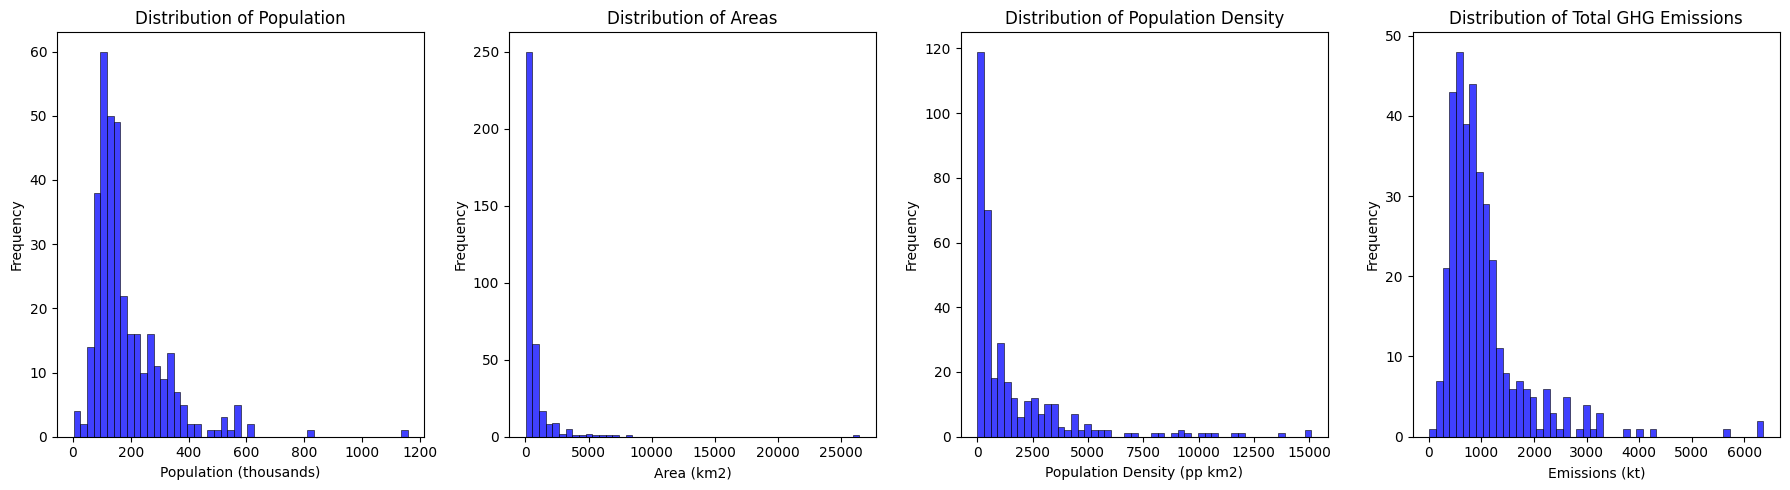

In [ ]:
def Obj4Fig1():

    Obj4_fig1, axes = plt.subplots(1, 4, figsize=(18, 5)) #Sets the figure to have 4 plots

    #Plots histograms for the four variables of interest
    seaborn_hist(Obj4, 'Mid-year Population (thousands)', 50, 'Distribution of Population', 'Population (thousands)', axes[0], 'b')
    seaborn_hist(Obj4, 'Area (km2)', 50, 'Distribution of Areas', 'Area (km2)', axes[1], 'b')
    seaborn_hist(Obj4, 'Population Density - person per km2', 50, 'Distribution of Population Density', 'Population Density (pp km2)', axes[2], 'b')
    seaborn_hist(Obj4, 'Total_GHG_emissions_kt', 50, 'Distribution of Total GHG Emissions', 'Emissions (kt)', axes[3], 'b')

    plt.tight_layout()
    plt.show()
Obj4Fig1()

In [ ]:
# Produce skewness and kurtosis table for variables of interest.
Obj4_table2 = skew_kurt_table(Obj4, ['Mid-year Population (thousands)', 'Area (km2)',
                                     'Population Density - person per km2', 'Total_GHG_emissions_kt'])
Obj4_table2

Variable   Skewness    Kurtosis
0      Mid-year Population (thousands)   2.569801   11.379198
1                           Area (km2)  10.056063  137.098083
2  Population Density - person per km2   2.909040   10.092056
3               Total_GHG_emissions_kt   3.042060   13.366358

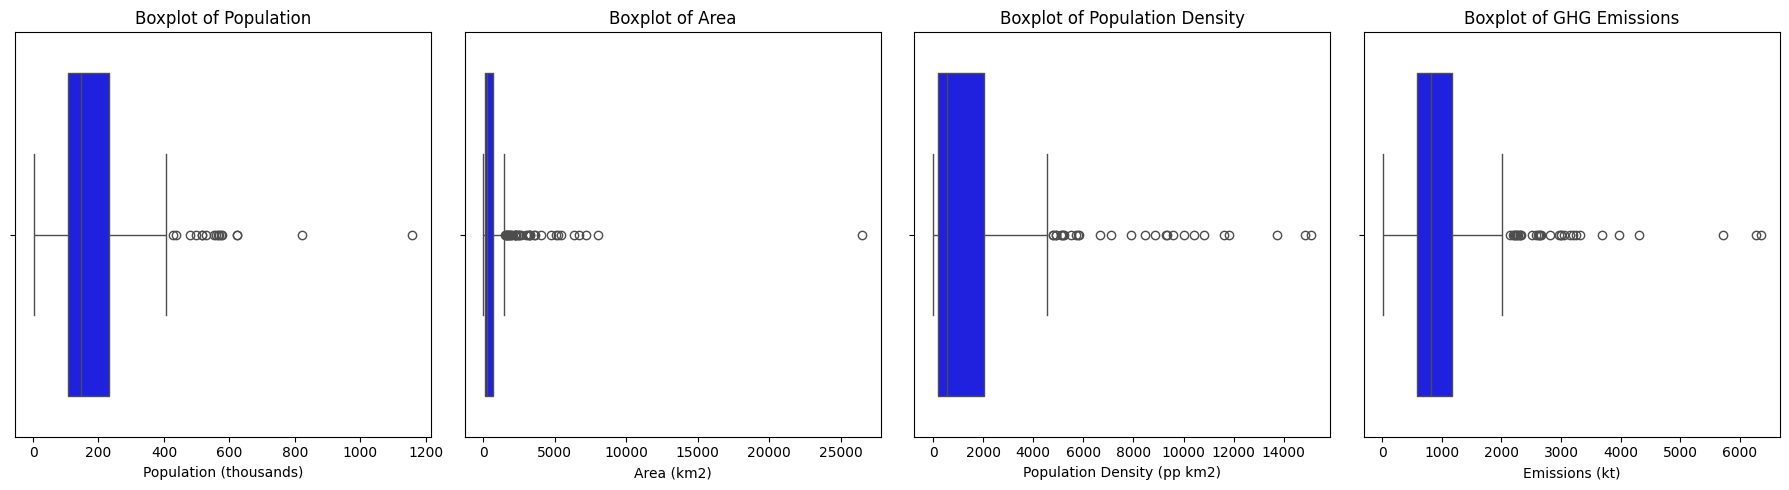

In [ ]:
# Produce a boxplot to visualise the distribution and key statistics of the data
def Obj4Fig2():

    Obj4_fig2, axes = plt.subplots(1, 4, figsize=(18, 5)) #Sets the figure to have 4 plots

    #Plots boxplots for the four variables of interest
    seaborn_boxplot(Obj4, 'Mid-year Population (thousands)', 'Boxplot of Population', 'Population (thousands)', axes[0], 'b')
    seaborn_boxplot(Obj4, 'Area (km2)', 'Boxplot of Area', 'Area (km2)', axes[1], 'b')
    seaborn_boxplot(Obj4, 'Population Density - person per km2', 'Boxplot of Population Density', 'Population Density (pp km2)', axes[2], 'b')
    seaborn_boxplot(Obj4, 'Total_GHG_emissions_kt', 'Boxplot of GHG Emissions', 'Emissions (kt)', axes[3], 'b')

    plt.tight_layout()
    plt.show()
Obj4Fig2()

We can perform an Anderson-Darling test to see the extent to which this data is not normally distributed.

In [ ]:
Obj4_table3 = Anderson_Darling_test(Obj4, ['Mid-year Population (thousands)', 'Area (km2)',
                                     'Population Density - person per km2', 'Total_GHG_emissions_kt'])
Obj4_table3

Variable  Test Statistic  \
0      Mid-year Population (thousands)       19.533213   
1                           Area (km2)       66.301671   
2  Population Density - person per km2       38.933242   
3               Total_GHG_emissions_kt       24.923115   

                     Critical Values          Significance Levels  
0  [0.57, 0.649, 0.779, 0.908, 1.08]  [15.0, 10.0, 5.0, 2.5, 1.0]  
1  [0.57, 0.649, 0.779, 0.908, 1.08]  [15.0, 10.0, 5.0, 2.5, 1.0]  
2  [0.57, 0.649, 0.779, 0.908, 1.08]  [15.0, 10.0, 5.0, 2.5, 1.0]  
3  [0.57, 0.649, 0.779, 0.908, 1.08]  [15.0, 10.0, 5.0, 2.5, 1.0]

The result above tells us that the data is far from being normally distributed, which is consistent with our other results. From the skewness table and the plots, we see that the data has many outliers, and is heavily skewed. It will aid our analysis of the relationships between the variables to remove these outliers.

The following function removes outliers using the 1st and 99th percentile method, which removes data points that are less than the 1st percentile or greater than the 99th percentile.

In [ ]:
def remove_outliers_pct(data, variables): # Function to remove outliers in the data using the 1st and 99th percentile method.
  data_cleaned = data

  for var in variables: #Loop through all the variables we want to remove outliers according to
    lower = data[var].quantile(0.01) # 1st quantile
    upper = data[var].quantile(0.99) # 99th quantile

    # Filters outliers
    data_cleaned = data_cleaned[(data_cleaned[var] >= lower) & (data_cleaned[var] <= upper)]

  return data_cleaned

In [ ]:
# Makes new dataset with outliers removed.
Obj4_cleaned = remove_outliers_pct(Obj4, ['Total_GHG_emissions_kt', 'Mid-year Population (thousands)',
                                          'Area (km2)', 'Population Density - person per km2'])

In [ ]:
Obj4_cleaned.info() # Display key info about dataframe

<class 'pandas.core.frame.DataFrame'>
Index: 339 entries, 0 to 360
Data columns (total 7 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Country                              339 non-null    object 
 1   Region                               339 non-null    object 
 2   Local Authority                      339 non-null    object 
 3   Total_GHG_emissions_kt               339 non-null    float64
 4   Mid-year Population (thousands)      339 non-null    float64
 5   Area (km2)                           339 non-null    float64
 6   Population Density - person per km2  339 non-null    float64
dtypes: float64(4), object(3)
memory usage: 21.2+ KB


The new dataframe has 339 rows, so 21 rows have been removed, which seems a reasonable amount as this is around 5% of the data.

Lets plot the histograms and boxplots for the new data with outliers removed.

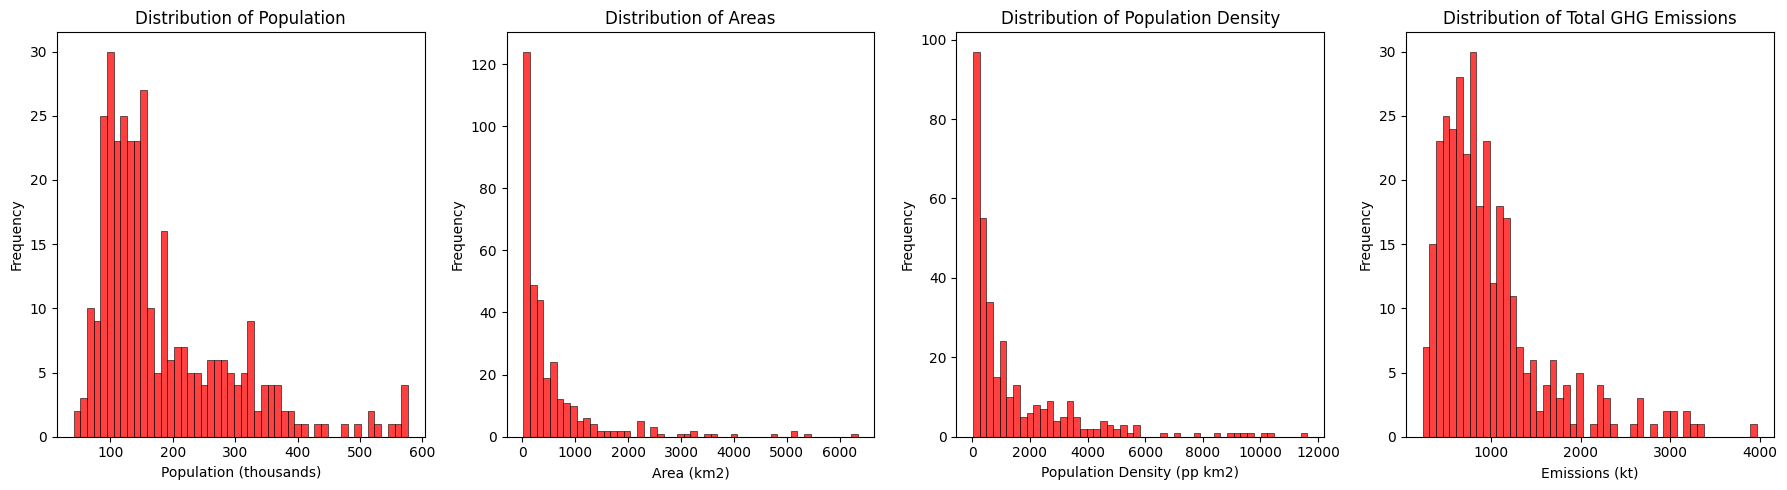

In [ ]:
def Obj4Fig3():
    Obj4_fig3, axes = plt.subplots(1, 4, figsize=(18, 5)) #Sets the figure to have 4 plots

    #Plots histograms for the four variables of interest
    seaborn_hist(Obj4_cleaned, 'Mid-year Population (thousands)', 50, 'Distribution of Population', 'Population (thousands)', axes[0], 'r')
    seaborn_hist(Obj4_cleaned, 'Area (km2)', 50, 'Distribution of Areas', 'Area (km2)', axes[1], 'r')
    seaborn_hist(Obj4_cleaned, 'Population Density - person per km2', 50, 'Distribution of Population Density', 'Population Density (pp km2)', axes[2], 'r')
    seaborn_hist(Obj4_cleaned, 'Total_GHG_emissions_kt', 50, 'Distribution of Total GHG Emissions', 'Emissions (kt)', axes[3], 'r')

    plt.tight_layout()
    plt.show()
Obj4Fig3()

The plot above shows that the distributions are more normal without the outliers.

In [ ]:
Obj4_table4 = skew_kurt_table(Obj4_cleaned, ['Mid-year Population (thousands)', 'Area (km2)',
                                             'Population Density - person per km2', 'Total_GHG_emissions_kt'])
Obj4_table4

Variable  Skewness   Kurtosis
0      Mid-year Population (thousands)  1.549571   2.317544
1                           Area (km2)  3.412755  13.893645
2  Population Density - person per km2  2.448651   6.918581
3               Total_GHG_emissions_kt  1.832202   3.878369

As expected, the data is far less skewed than before, and the kurtosis has decreased substantially.

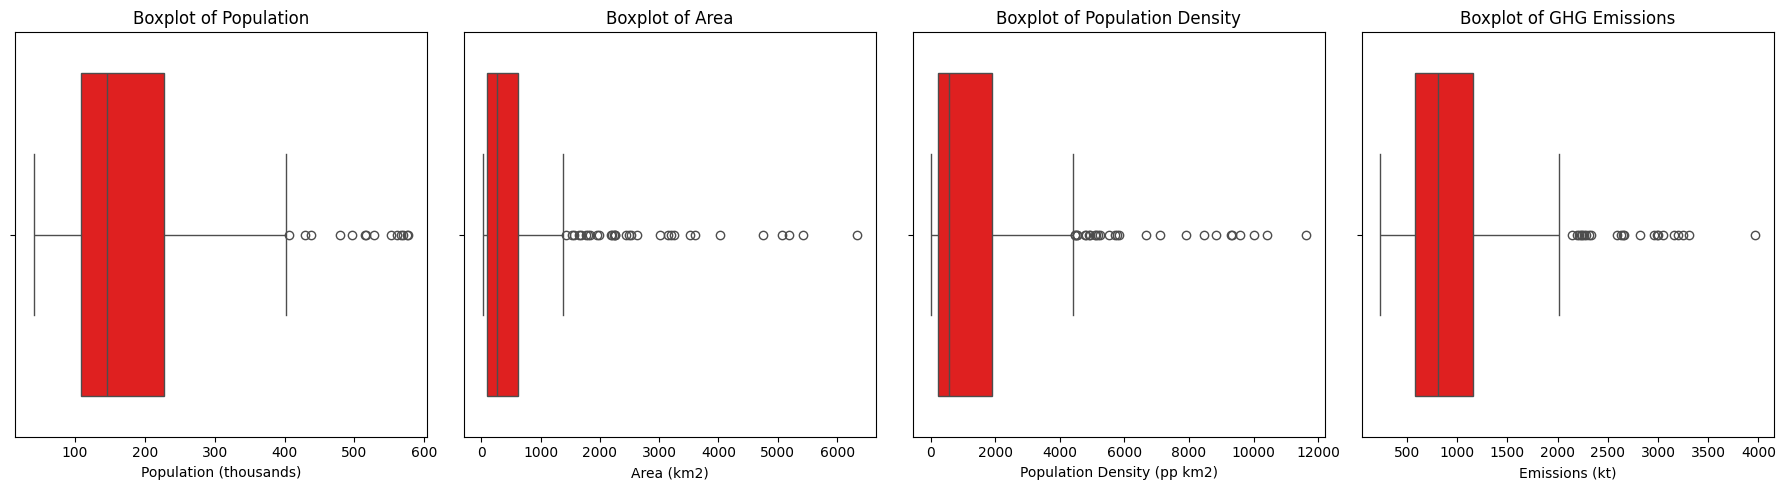

In [ ]:
def Obj4Fig4():
    Obj4_fig4, axes = plt.subplots(1, 4, figsize=(18, 5)) #Sets the figure to have 4 plots

    #Plots boxplots for the four variables of interest
    seaborn_boxplot(Obj4_cleaned, 'Mid-year Population (thousands)', 'Boxplot of Population', 'Population (thousands)', axes[0], 'r')
    seaborn_boxplot(Obj4_cleaned, 'Area (km2)', 'Boxplot of Area', 'Area (km2)', axes[1], 'r')
    seaborn_boxplot(Obj4_cleaned, 'Population Density - person per km2', 'Boxplot of Population Density', 'Population Density (pp km2)', axes[2], 'r')
    seaborn_boxplot(Obj4_cleaned, 'Total_GHG_emissions_kt', 'Boxplot of GHG Emissions', 'Emissions (kt)', axes[3], 'r')

    plt.tight_layout()
    plt.show()
Obj4Fig4()

In an attempt to normalise the data, we can apply a log transformation as the data is heavily right skewed.

In [ ]:
Obj4_cleaned[['Log_Mid-year Population (thousands)', 'Log_Area (km2)',
              'Log_Population Density - person per km2', 'Log_Total_GHG_emissions_kt']] = \
Obj4_cleaned[['Mid-year Population (thousands)', 'Area (km2)',
              'Population Density - person per km2', 'Total_GHG_emissions_kt']].apply(np.log1p)

Perform an anderson darling test on the log transformed data to test if the data is now normally distributed.

In [ ]:
Obj4_table5 = Anderson_Darling_test(Obj4_cleaned, ['Log_Mid-year Population (thousands)', 'Log_Area (km2)',
                                     'Log_Population Density - person per km2', 'Log_Total_GHG_emissions_kt'])
Obj4_table5

Variable  Test Statistic  \
0      Log_Mid-year Population (thousands)        3.425515   
1                           Log_Area (km2)        0.978926   
2  Log_Population Density - person per km2        1.487417   
3               Log_Total_GHG_emissions_kt        0.677259   

                       Critical Values          Significance Levels  
0  [0.569, 0.648, 0.778, 0.907, 1.079]  [15.0, 10.0, 5.0, 2.5, 1.0]  
1  [0.569, 0.648, 0.778, 0.907, 1.079]  [15.0, 10.0, 5.0, 2.5, 1.0]  
2  [0.569, 0.648, 0.778, 0.907, 1.079]  [15.0, 10.0, 5.0, 2.5, 1.0]  
3  [0.569, 0.648, 0.778, 0.907, 1.079]  [15.0, 10.0, 5.0, 2.5, 1.0]

This test implies that even after log tranformation, population and population density are not normally distributed at any significance level, whereas we accept at the 1% significance level that area is normally distributed, and accept at the 5% signficance level that GHG emissions are normally distributed. We can therefore only use parametric tests on log area and emissions, and for other relationships we must use non-parametric tests. For easy comparison, it will be easier to use non-parametric tests on all relationships.

**Part 3: Correlation**

First, define a function that plots a seaborn scatter plot for given data.

In [ ]:
def seaborn_scatter(DATA, X, Y,  xlabel, ylabel, title, ax, colour):
    sns.scatterplot(data=DATA, x = X, y = Y, alpha=0.6, ax=ax, color=colour) #Plots scatter
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)

Next, define a function that performs a Spearman rank correlation test.

In [ ]:
def spearmanr_test(data, var_1, variables):
  results = []
  for var in variables:
    corr_coef, p_value = stats.spearmanr(data[var_1], data[var])
    results.append({'Variable 1': var_1, 'Variable 2': var,  'Correlation Coefficient': corr_coef, 'p-value': p_value})

  return pd.DataFrame(results)

The following figure is scatter plots of emissions and the variables of interest, with outliers excluded.

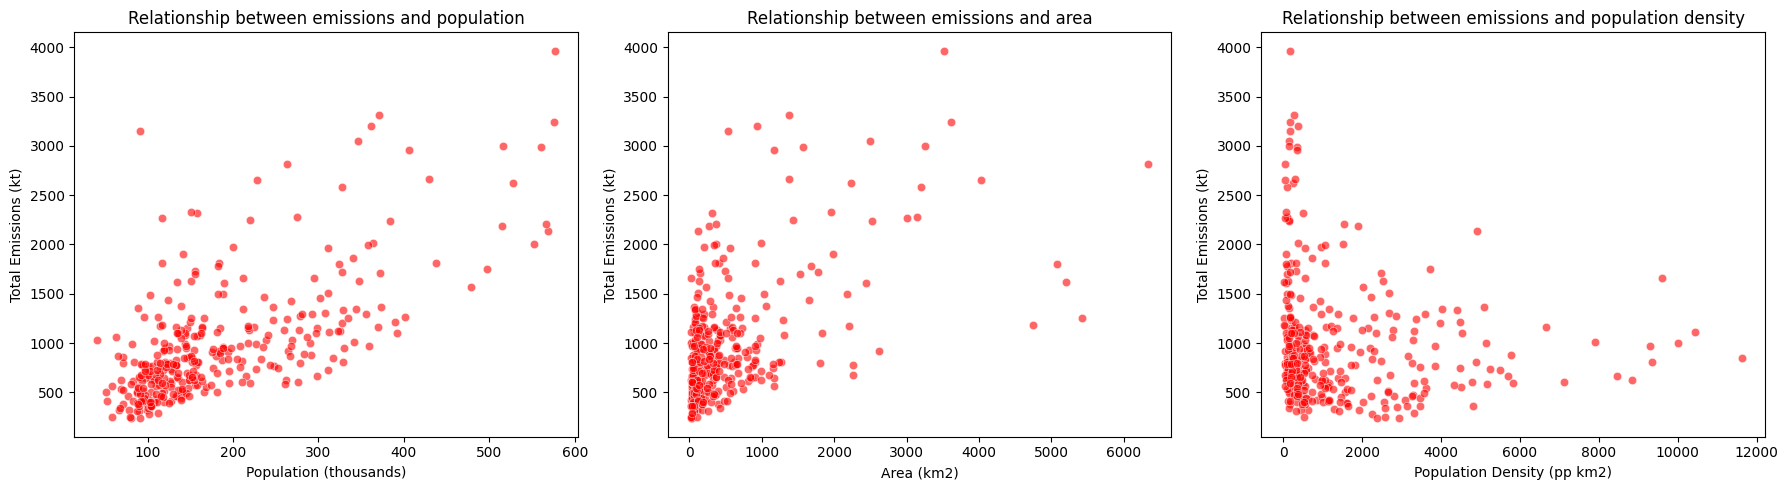

In [ ]:
def Obj4Fig5():
    Obj4_fig5, axes = plt.subplots(1, 3, figsize=(18, 5)) #Sets the figure to have 4 plots

    #Plots scatter plots for the three relationships of interest, with outliers removed
    seaborn_scatter(Obj4_cleaned, 'Mid-year Population (thousands)', 'Total_GHG_emissions_kt','Population (thousands)',
                'Total Emissions (kt)', 'Relationship between emissions and population', axes[0], 'r')
    seaborn_scatter(Obj4_cleaned, 'Area (km2)', 'Total_GHG_emissions_kt','Area (km2)',
                'Total Emissions (kt)', 'Relationship between emissions and area', axes[1], 'r')
    seaborn_scatter(Obj4_cleaned, 'Population Density - person per km2', 'Total_GHG_emissions_kt','Population Density (pp km2)',
                'Total Emissions (kt)', 'Relationship between emissions and population density', axes[2], 'r')


    plt.tight_layout()
    plt.show()
Obj4Fig5()

The scatter plots above show how increases in population, area and population density are associated with changes in total emissions. We can perform a spearman rank correlation test to statistically understand the above relationships

In [ ]:
Obj4_table6 = spearmanr_test(Obj4_cleaned, 'Total_GHG_emissions_kt', ['Mid-year Population (thousands)', 'Area (km2)',
                                                   'Population Density - person per km2'])
Obj4_table6

Variable 1                           Variable 2  \
0  Total_GHG_emissions_kt      Mid-year Population (thousands)   
1  Total_GHG_emissions_kt                           Area (km2)   
2  Total_GHG_emissions_kt  Population Density - person per km2   

   Correlation Coefficient       p-value  
0                 0.666015  8.196292e-45  
1                 0.470171  4.780893e-20  
2                -0.205977  1.337418e-04

The table above shows the correlation coefficient, i.e. the strength of association, between the variables, and the p-value, which tells us if the result is statistically significant.

# Project Outcome

## Overview of Results

In 2022, Northern Ireland was the highest emitting country and the second highest region based on the average GHG emissions of local authorities. The highest emitting region was Yorkshire and the Humber. England had the lowest average emissions at the country level, while the South East region had the lowest emissions at the regional level.

The highest emitting local authority in 2022 was North Lincolnshire and the lowest was the Isles of Scilly. Birmingham was in the top 5 emitters in multiple sectors, while the Isles of Scilly, Orkney Islands, and the Shetland Islands were among the lowest 5 emitters in multiple sectors. The City of London was a top 5 and lowest 5 emitter in different sectors.

Total GHG emissions varied significantly across sectors and regions. Transport and Domestic were the largest emissions contributors, while LULUCF was the lowest. Non-parametric tests revealed major differences between sectors, with few exceptions. Regional differences showed the South East had the highest Transport and Domestic emissions, while Northern Ireland had low emissions across all sectors.

Population, area and emissions across the UK exhibit positively skewness and leptokurtosis, with values clustered around small numbers and a long tail of outliers. Local authorities with larger populations and areas tend to have higher emissions, owing to their greater energy consumption. In contrast, densely populated local authorities usually have lower emissions, likely reflecting efficiencies that come with compact living.

## Objective 1

### Explanation of results

**Country-level results**

In 2022, England was the highest GHG emitter, with a total of 290955 kt, accounting for the majority of the UK’s emissions. Its emissions were more than 7.5 times higher than Scotland, the second-largest emitter. Northern Ireland showed the lowest annual total emissions, at 18681 kt. However, England is the largest country in the UK, including 296 local authorities out of 361. This leads to disproportionately high emissions and could be misleading. To account for differences in the number of local authorities across countries, comparisons were made based on the average GHG emissions of local authorities in each country. Statistical analysis revealed Northern Ireland’s average GHG emissions per local authority (x̄= 1698.2 kt) were significantly higher than those of Scotland (Dunn test, p= 0.019951), Wales (Dunn test, p= 0.041315) and in England (Dunn test, p= 0.000158). Scotland, Wales and England exhibited similar average GHG emissions of local authorities.

**Regional-level results**

The top three GHG emitting UK regions in 2022 were South East (41419 kt), followed by North West (40593 kt) and Scotland (38857 kt). The regions with the lowest emissions were the North East (14017 kt), Northern Ireland (18681 kt) and Wales (26836 kt). However, there is variation in the number of local authorities across regions. For example South East has 64 local authorities, whereas Northern Ireland has only 11. Thus, comparing average GHG emissions per local authority across regions allowed to normalize the data, making it easier to compare the regions regardless of their overall size. Based on statistical analysis with Dunn's test, Yorkshire and the Humber (x̄= 2367 kt) and Northern Ireland’s (x̄= 1698 kt) had significantly higher average local authority GHG emissions than the four lowest emitting regions, underlining their important contribution to GHG emissions. In contrast, the South East region showed significantly lower average local authority emissions compared to the top four emitting regions.



### Visualisation

The following barchart compares the total annual GHG emissions of UK countries in 2022.

<ipython-input-33-d1dcc787dd3c>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=GHG_Countries, x= 'Country', y = 'Total_GHG_emissions_kt', palette='pastel')


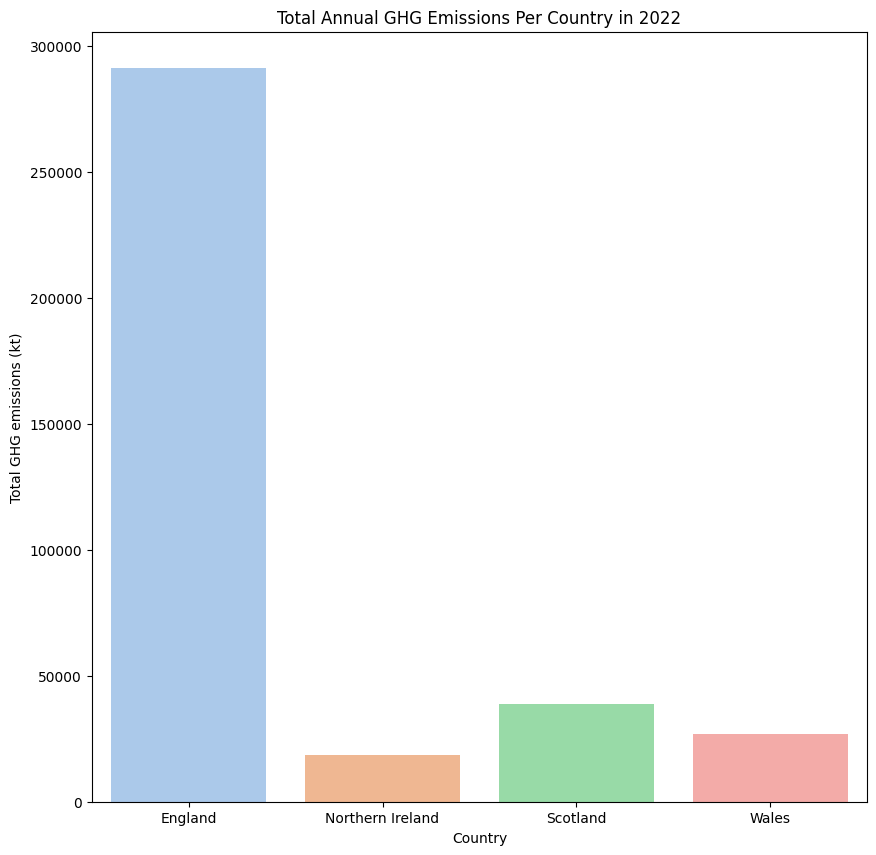

In [ ]:
Obj1fig1()

The following boxplot compares the GHG emissions of local authorities within UK countries in 2022.

<ipython-input-40-ee6faebeb32d>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = Obj1, y = "Total_GHG_emissions_kt", x= "Country", palette='pastel')


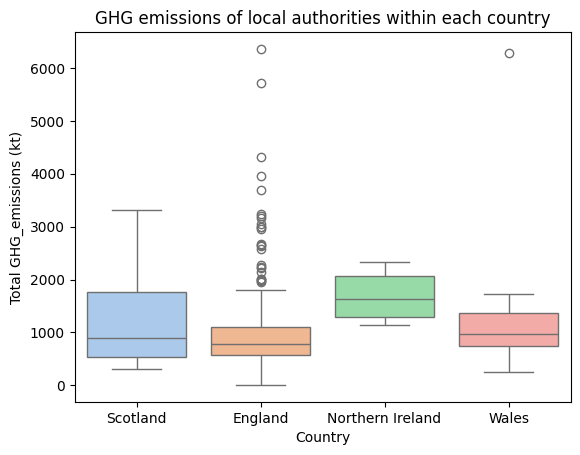

In [ ]:
Obj1fig2()

The following barchart compares the total annual GHG emissions of UK regions in 2022.

<ipython-input-42-ade594fa58dd>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=GHG_Regions, x= 'Region', y = 'Total_GHG_emissions_kt', palette='pastel')


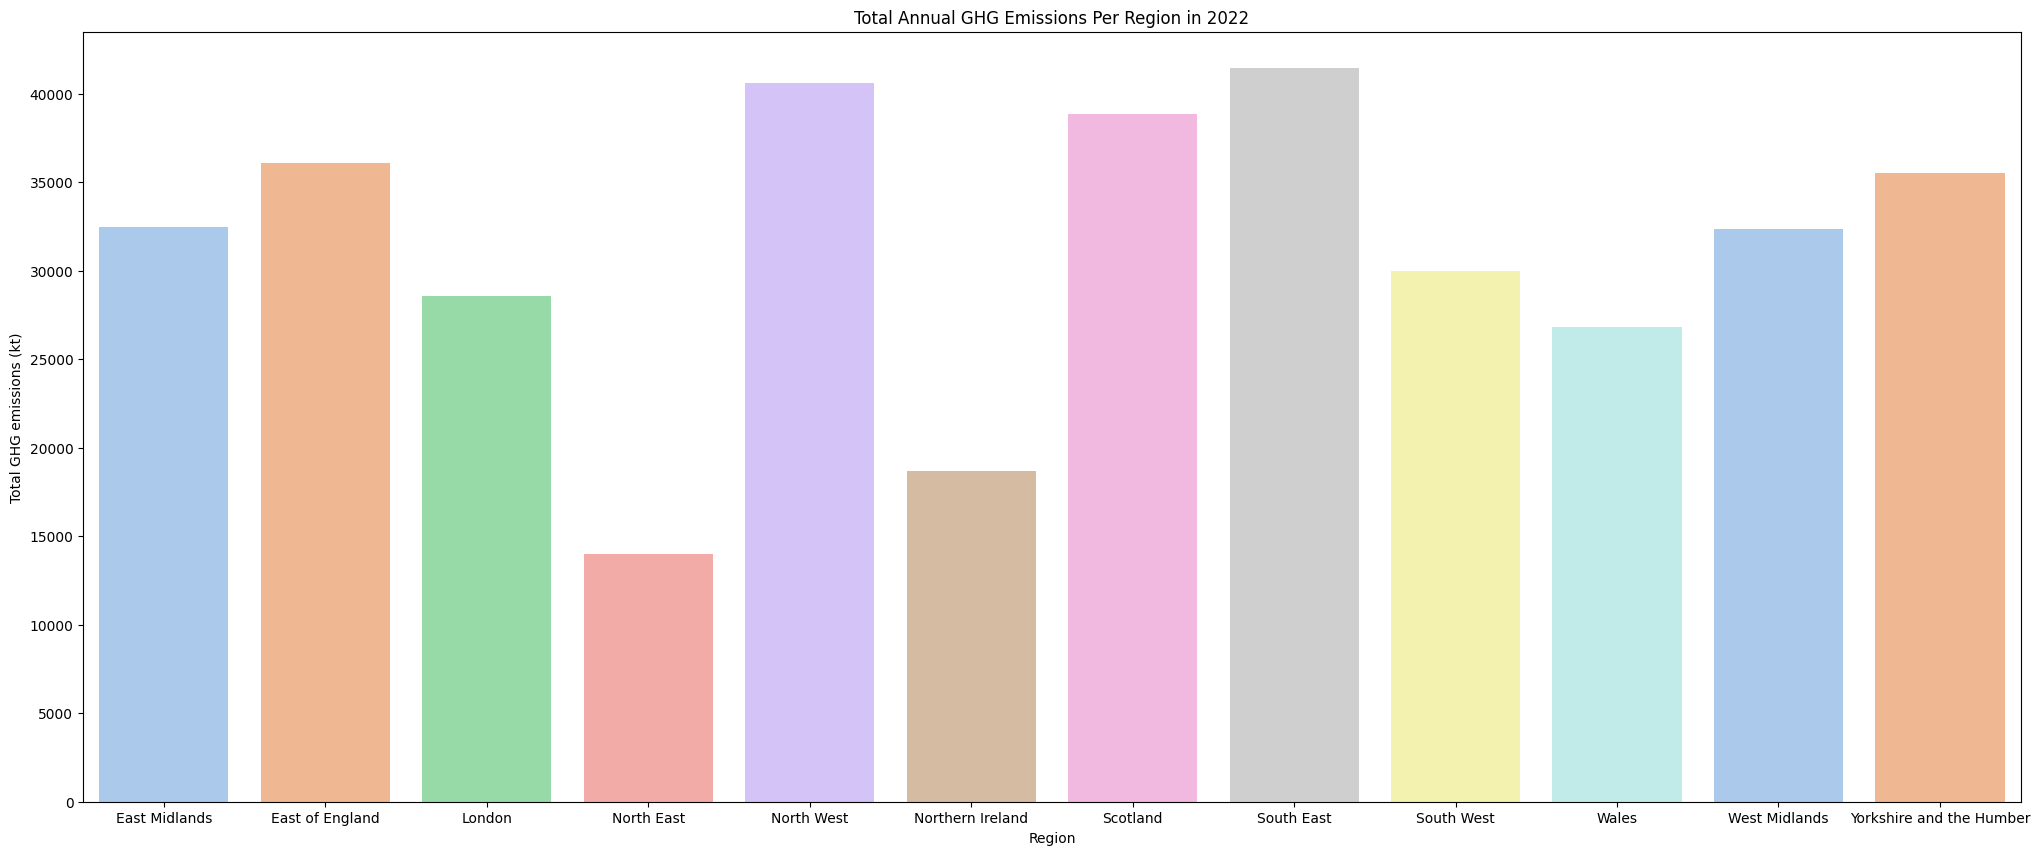

In [ ]:
Obj1fig3()

The following map shows the total regional GHG emissions in 2022.

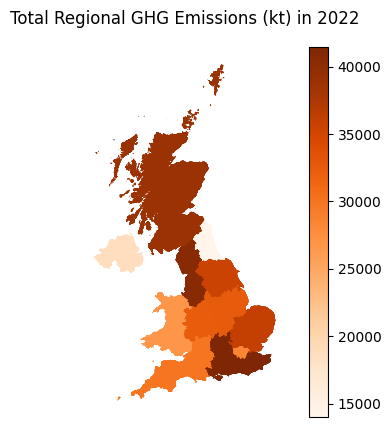

In [ ]:
regionmap1()

The following boxplot compares the GHG emissions of local authorities within UK regions in 2022.

<ipython-input-48-c588a17b96e9>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = Obj1, y = "Total_GHG_emissions_kt", x= "Region", palette='pastel')


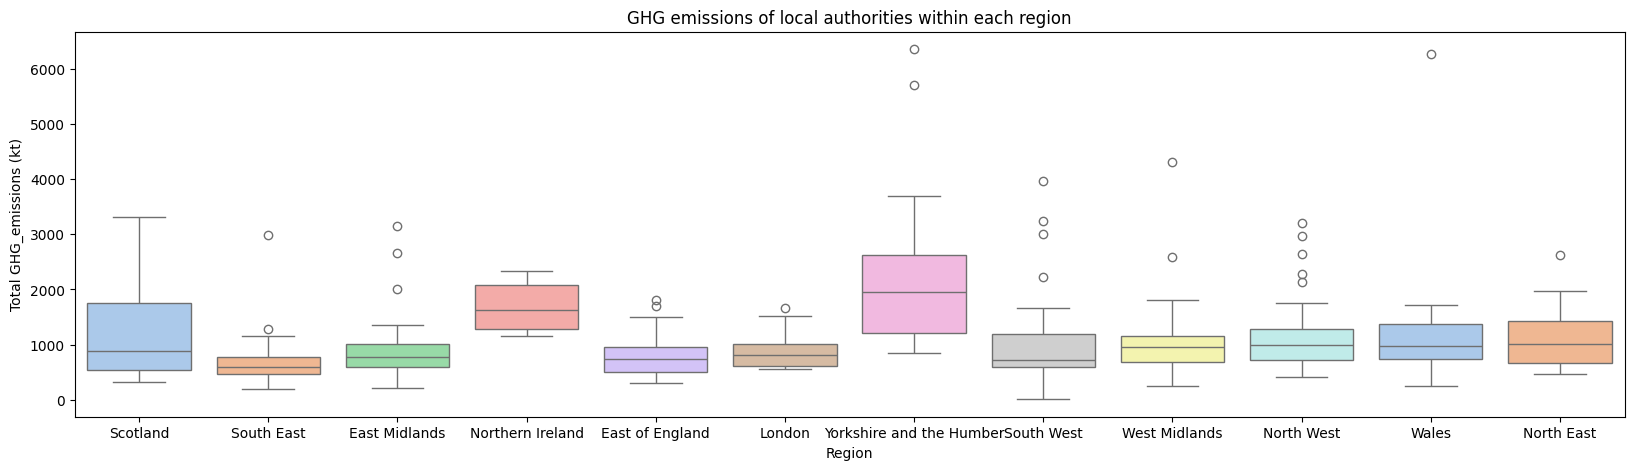

In [ ]:
Obj1fig4()

The following map shows the average GHG emissions of local authorities within regions.

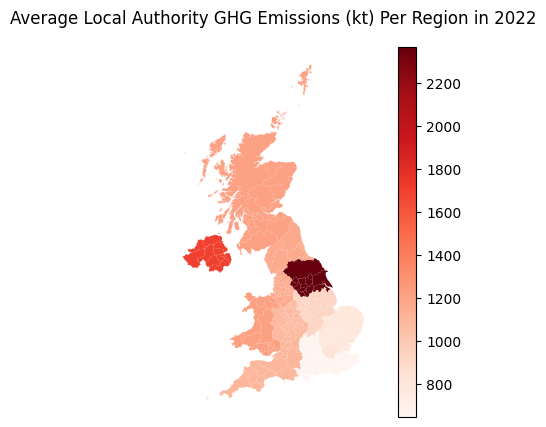

In [ ]:
regionmap2()

## Objective 2

### Explanation of results

**Local Authority Greenhouse Gas Emissions**

Across all sectors in 2022, average greenhouse gas emissions per local authority were 1039.7 kt. However, the range of greenhouse gas emitted per local authority was remarkably varied, with the lowest-emitting local authority (Isles of Scilly) emitting 8.9 kt, and the highest-emitting local authority (North Lincolnshire) emitting 6369.7kt. The lowest sector emissions in a local authority was Northumberland, with a negative emission of -471.6 kt for LULUCF, and the highest emissions in a local authority was in Neath Port Talbot in Wales, with 5659.2 kt emitted in industry.

Looking at emissions by sector by local authority, it is visible that Land Use, Land Use Change, and Forestry as a sector is the lowest emitting sector, with multiple Local Authorities having a GHG offset of hundreds of kt.

The lowest 5 emitting local authorities in regards to land use are visibly outliers, as are the top 5 emitting local authorities in regards to industry.

Birmingham is shown to be in the top 5 in five sectors for greenhouse gas emissions. Reasons for this should be explored in further study.
The Kruskal-Wallis test shows strong evidence against the null hypothesis for differences between the highest and lowest emitting local authorities and the rest of the data. The subsequent Dunn test shows a signficant difference between low emitters and the rest of the data, but an even more significant difference between high emitters and the rest of the data. Graph 2.3 strongly illustrates this point. The reasons as to why the highest emitters emit far more greenhouse gas than the average emitters are unknown, but it raises potential questions for further research.


### Visualisation

Graph 2.1 - This bar chart shows the 5 highest polluting local authorities by each sector, and how many sectors each local authority is one of the top 5 polluting in.

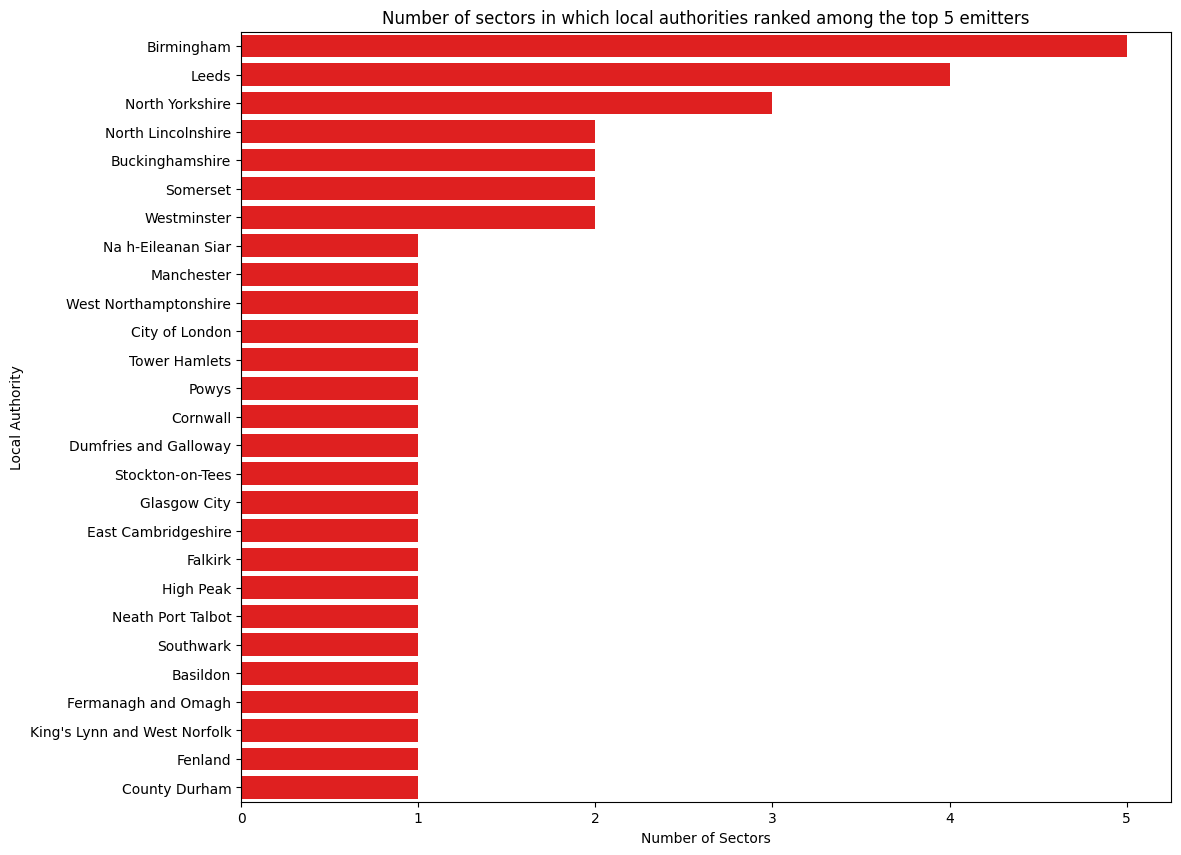

In [ ]:
highemitterbar()

Graph 2.2 - This bar chart shows the 5 lowest polluting local authorities by each sector, and how many sectors each local authority is one of the lowest 5 polluting in.

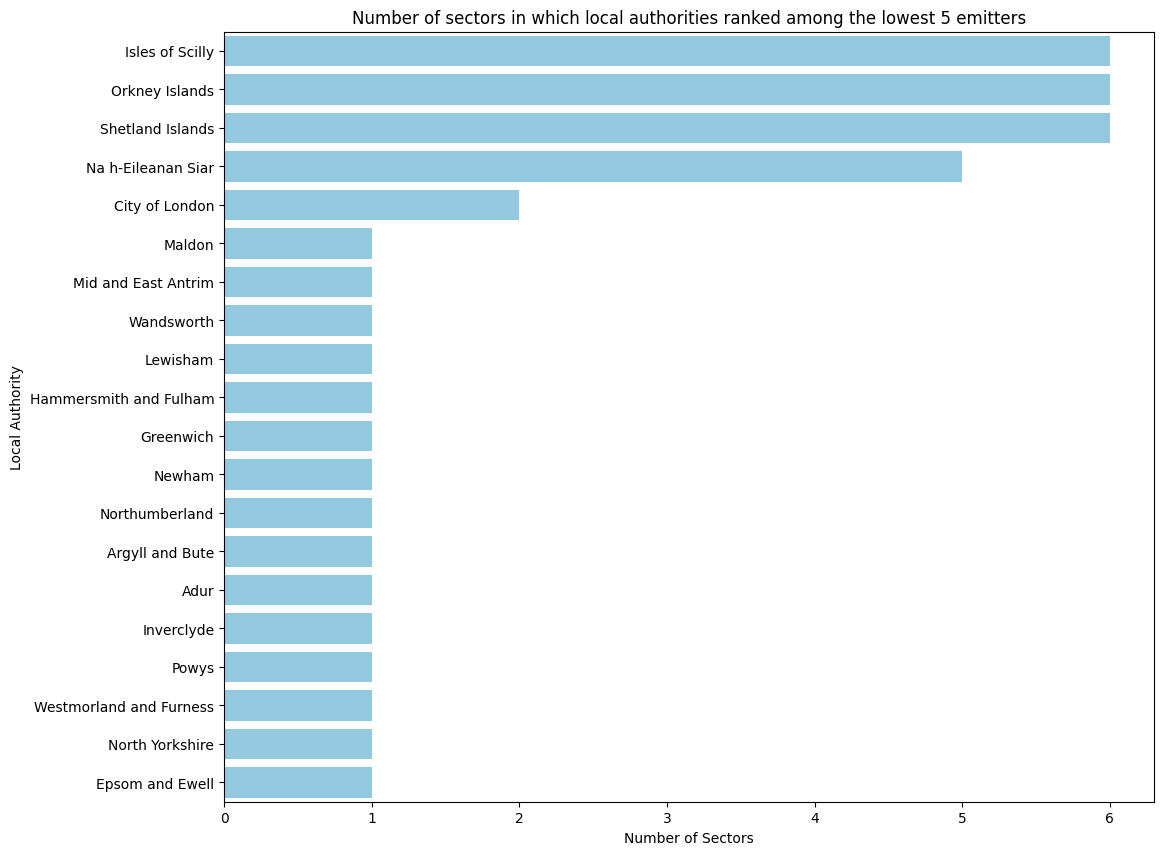

In [ ]:
lowemitterbar()

Graph 2.3 - This stacked bar chart shows the distribution of GHG emissions by the lowest and top 5 emitting LAs by sector, and how this compares to the rest of the LAs.

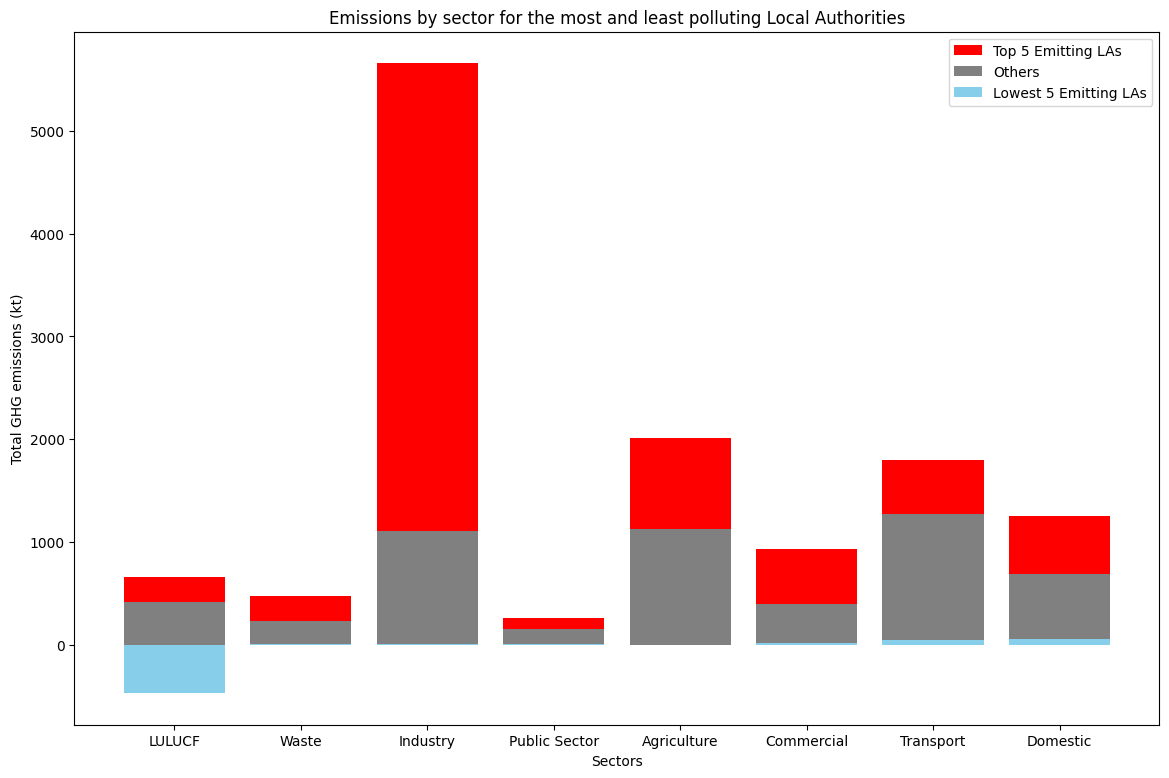

In [ ]:
toplowemissionsbar()

Map 2.4 - This map shows the total GHG emissions from each local authority.

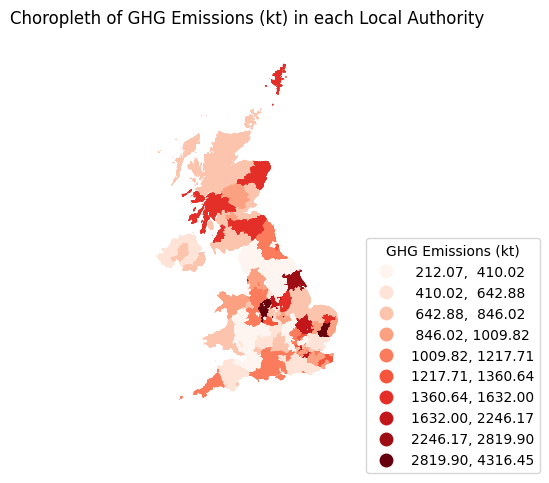

In [ ]:
LAchoropleth()

## Objective 3

### Explanation of Results

Total greenhouse gas (GHG) emissions were substantially varied across the sectors. The Transport sector contributed the largest share, with its total emissions amounting to 114656.4kt, accounting for 31% of all emissions. This was followed by the Domestic sector at 84179.9kt (22.7%) and the Agriculture sector at 54132.5kt (14.6%). Land Use, Land-Use Change and Forestry (LULCF) sector exhibited the lowest emissions (2965.7kt).

The Shapiro-Wilk test revealed that emissions across the sectors were not normally distributed (p < 0.05 for all sectors). This justified the use of non-parametric testing to compare emissions distributions across the sectors. From this, a Kruskal-Wallis test showed highly significant results (p < 0.05), and a high test statistic (1520.2) which indicates a significant difference between sectors. Post-hoc testing (Dunn's test) identified very strong statistically significant differences between certain sectors, particularly LULCF, Domestic and Public Sector. However, a few comparisons such as Agriculture vs. Waste (p = 0.156) and Domestic vs. Transport (p = 0.578) were not statistically significant.

When identifying regional patterns by sector, significant variations were observed between areas. South East had the highest emissions in both the Transport (16650.9kt) and Domestic (11777.8kt). In contrast, Northern Ireland reported the lowest emissions for these two highly contributing sectors, with Transport emissions just 1712kt and Domestic emissions at 3619.3kt. Agriculture displayed relatively consistent emissions across most regions, with no single region standing out as a significant emitter. Regional variations by sector illustrate the need for tailored strategies and policies to address the challenges each region faces in reducing GHG emissions.

### Visualisation

The following bar chart illustrates average GHG emissions by sector in 2022.

<ipython-input-102-2bab3dd60260>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=GHGsector2, x='LA GHG Sector', y='Total_GHG_emissions_kt', palette="viridis", errorbar = None, estimator = 'sum')


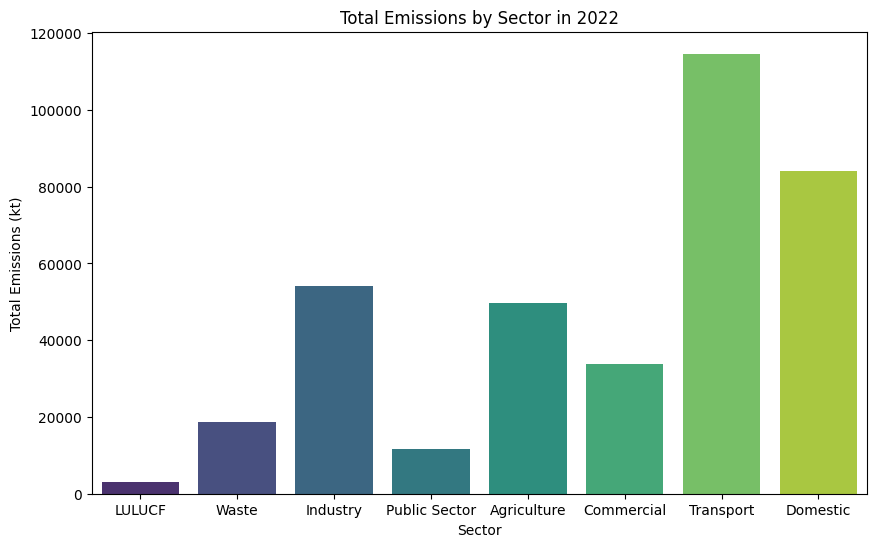

In [ ]:
sector_emissions_bar()

This grouped bar chart shows the total GHG emissions for various sectors across regions in 2022.

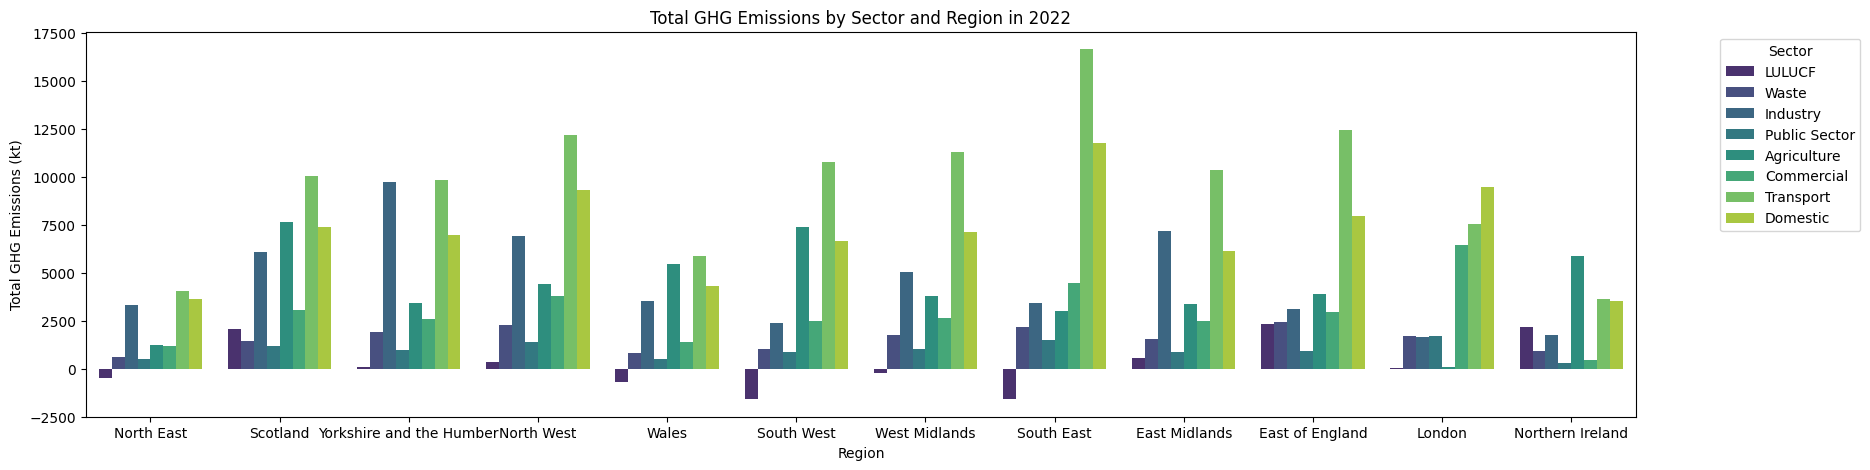

In [ ]:
sector_region_bar()

This heatmap visually represents total GHG emissions by sector and region in 2022.

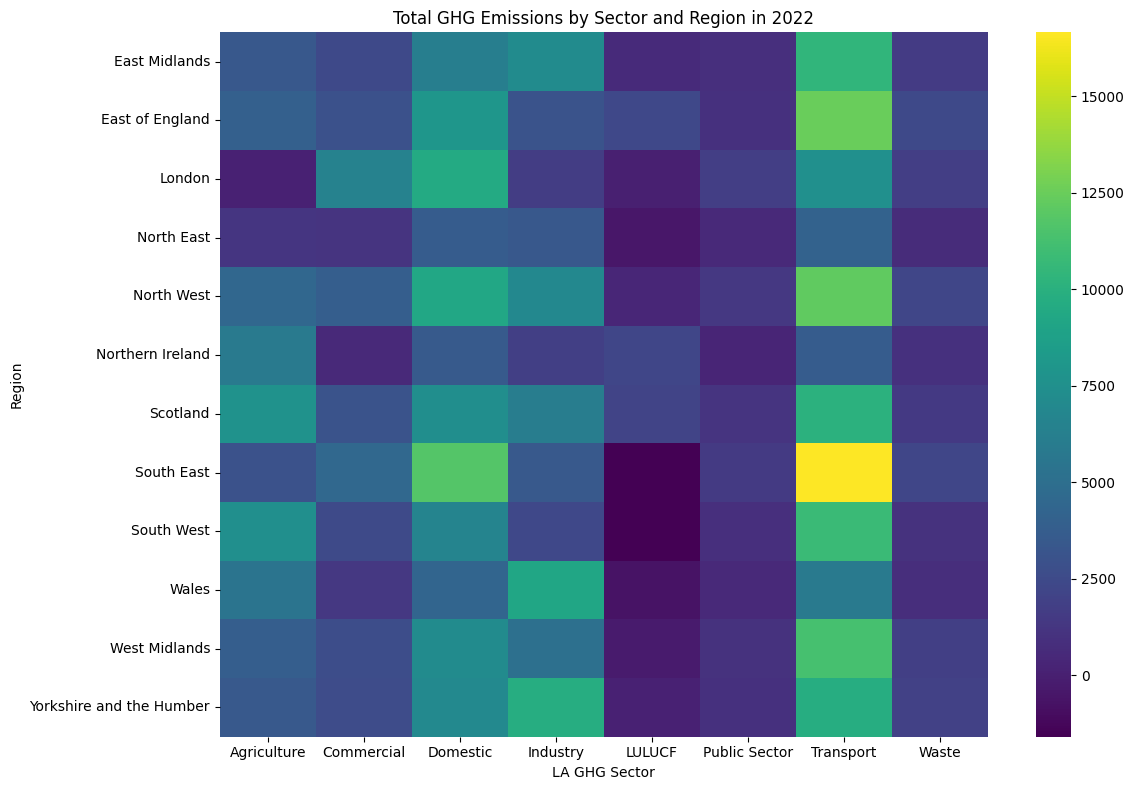

In [ ]:
sector_region_heatmap()

## Objective 4

### Explanation of results

The distribution of population, area, population density and emissions are all positively skewed, each to varying degrees. Among these, area is the most postively skewed (skewness = 3.41) and is also leptokurtic (kurtosis = 13.89), suggesting that local authority areas exhibit numerous small values and a few outliers on the right tail of the distribution. Population density follows as the next most positively skewed variable (skewness = 2.45) and also shows high kurtosis, indicating a concentration of lower-density areas and a small number of areas with exceptionally high density. Emissions and population have lower levels of skew (1.83 and 1.55, respectively). Population has kurtosis below 3, implying a more normal distribution with fewer extreme values, while emissions, with kurtosis above 3, has a heavier right tail with some outliers. The Anderson-Darling test decisively asserts that the variables are not normally distributed, as can be inferred from the histograms and boxplots. Under a log transformation, area and population are normally distributed at the 1% and 5% level, respectively, whilst population density and emissions are not normally distributed at any significance level.

There is a moderate-strong positive correlation between population and emissions (Spearman's rank correlation, rs= 0.66, p < 0.01), indicating that areas with higher populations are associated with increased greenhouse gas emissions. There is also a moderate positive correlation between area and emissions (Spearman's rank correlation, rs= 0.47, p < 0.01), showing that larger areas tend to have higher emissions, though the relationship is not as strong as that with population. Conversely, population density has a weak negative correlation with emissions (Spearman's rank correlation, rs= -0.20, p= < 0.01), suggesting that higher density may be associated with a small reduction in emissions. These results are all statistically significant, with over 99.9% confidence in all results. These relationships can be seen visually in the scatter plots. The associations for emissions against population and area look roughly linear, whereas the relationship for population density appears more complex, with further analysis needed to understand the distribution.

### Visualisations and Tables

In [ ]:
Obj4_table1 # Summary statistics for population, area, population density and GHG Emissions

Mid-year Population (thousands)    Area (km2)  \
count                       361.000000    361.000000   
mean                        187.247316    688.968340   
std                         127.203385   1730.622171   
min                           2.281000      3.149600   
25%                         107.672000     90.321500   
50%                         146.136000    269.063700   
75%                         232.753000    639.492600   
max                        1157.603000  26473.949600   

       Population Density - person per km2  Total_GHG_emissions_kt  
count                           361.000000              361.000000  
mean                           1577.210011             1039.688512  
std                            2372.835816              808.802163  
min                               7.991687                8.954461  
25%                             200.701359              577.302250  
50%                             560.579653              811.262648  
75%                            2034.721915             1164.846780  
max                           15100.301275             6359.734815

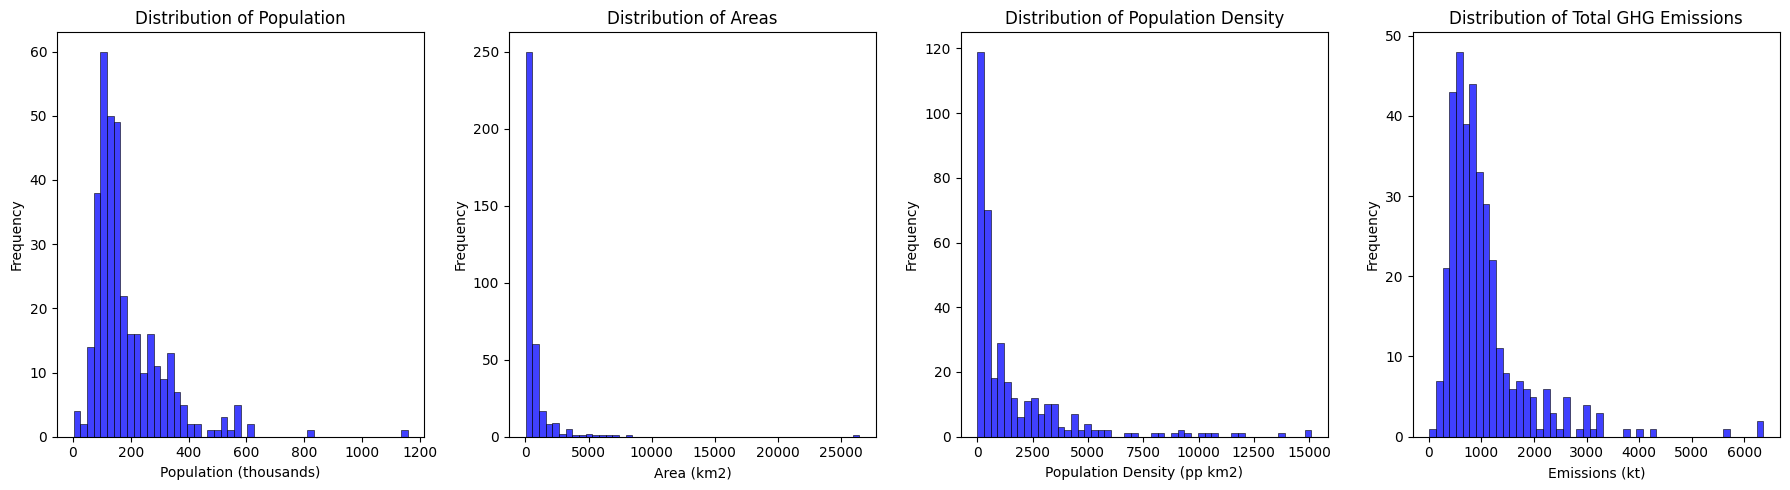

In [ ]:
Obj4Fig1() # Histograms of population, area, population density and GHG emissions

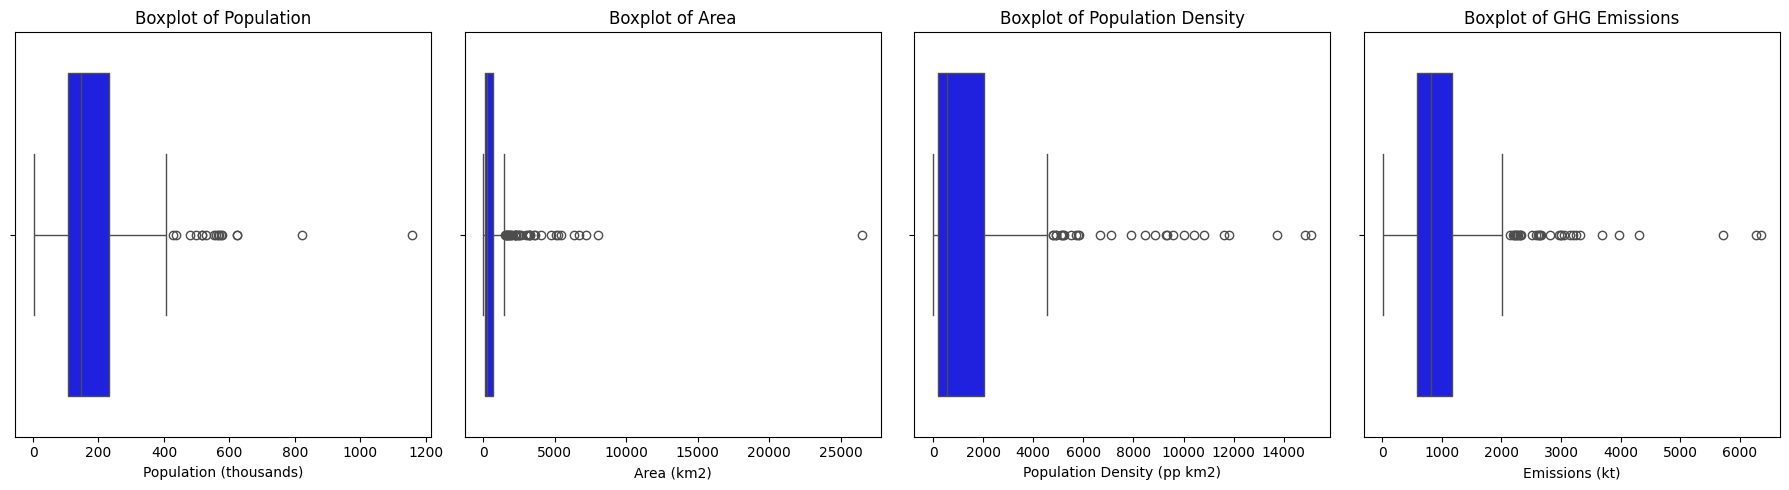

In [ ]:
Obj4Fig2() # Boxplots for population, area, density and emissions

In [ ]:
Obj4_table2 # Table showing the skewness and kurtosis of population, area, population density and GHG emissions

Variable   Skewness    Kurtosis
0      Mid-year Population (thousands)   2.569801   11.379198
1                           Area (km2)  10.056063  137.098083
2  Population Density - person per km2   2.909040   10.092056
3               Total_GHG_emissions_kt   3.042060   13.366358

In [ ]:
Obj4_table3 # Results of Anderson-Darling Normality test

Variable  Test Statistic  \
0      Mid-year Population (thousands)       19.533213   
1                           Area (km2)       66.301671   
2  Population Density - person per km2       38.933242   
3               Total_GHG_emissions_kt       24.923115   

                     Critical Values          Significance Levels  
0  [0.57, 0.649, 0.779, 0.908, 1.08]  [15.0, 10.0, 5.0, 2.5, 1.0]  
1  [0.57, 0.649, 0.779, 0.908, 1.08]  [15.0, 10.0, 5.0, 2.5, 1.0]  
2  [0.57, 0.649, 0.779, 0.908, 1.08]  [15.0, 10.0, 5.0, 2.5, 1.0]  
3  [0.57, 0.649, 0.779, 0.908, 1.08]  [15.0, 10.0, 5.0, 2.5, 1.0]

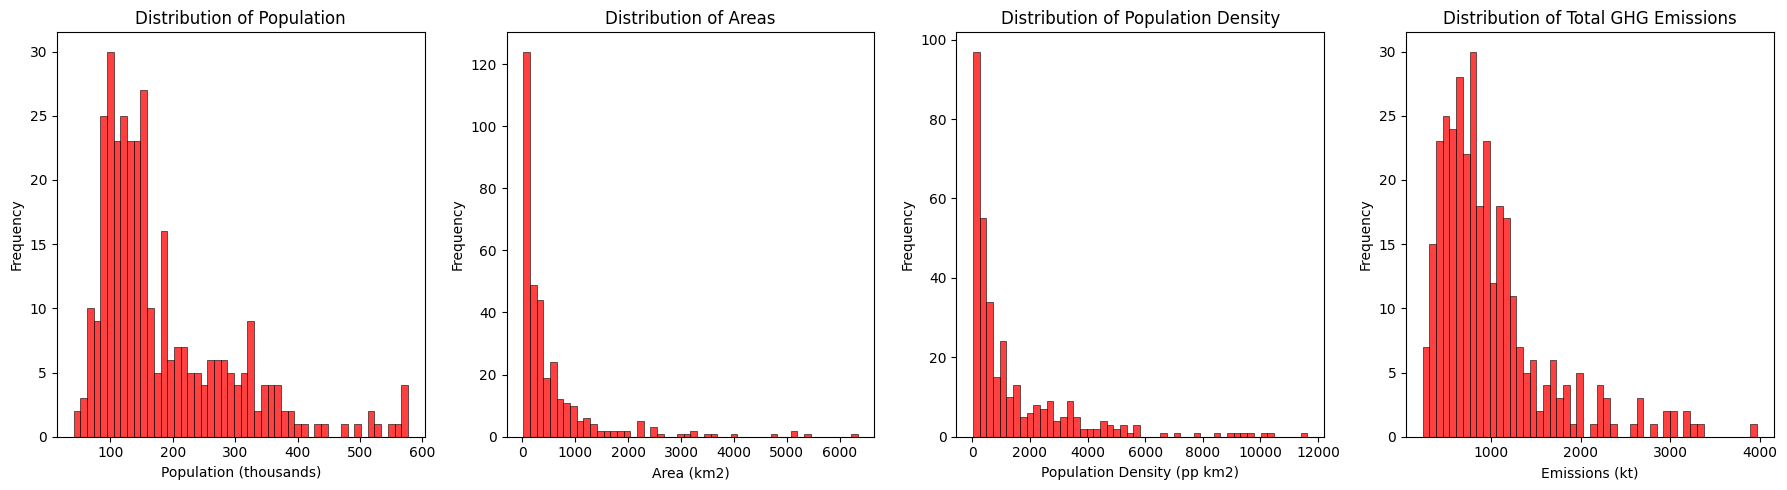

In [ ]:
Obj4Fig3() # Histograms with outliers excluded

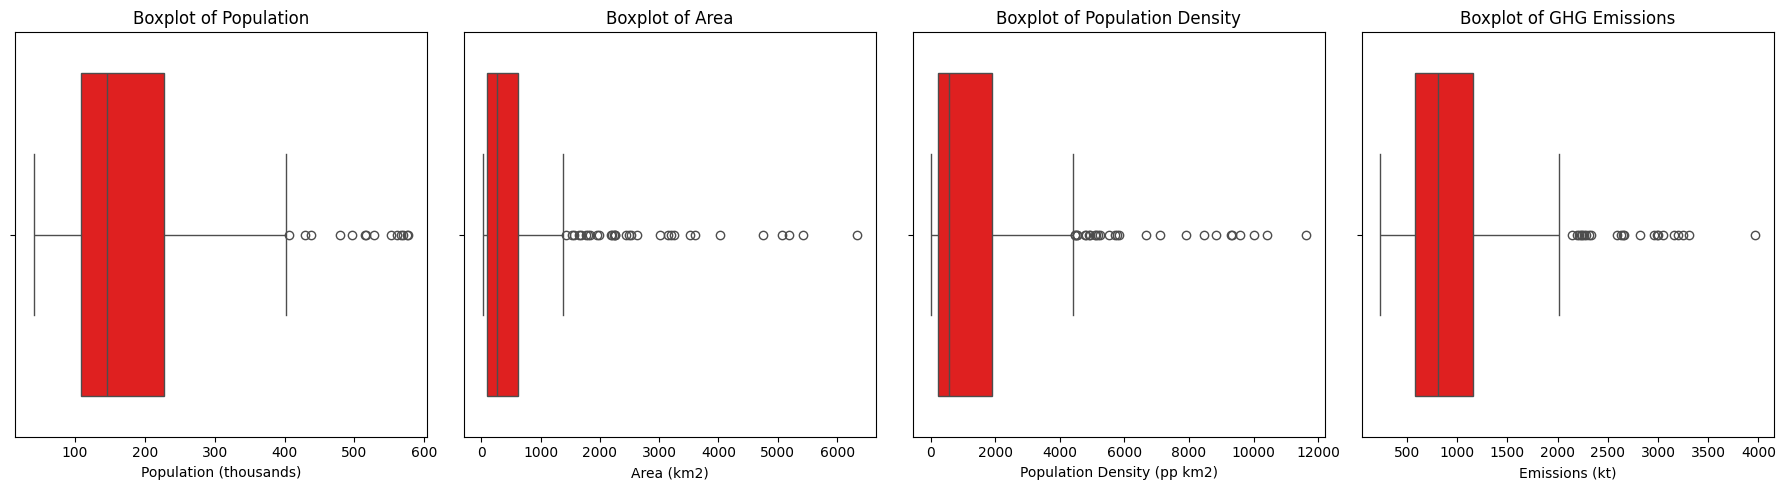

In [ ]:
Obj4Fig4() # Boxplots with outliers excluded

In [ ]:
Obj4_table4 # Skewness and kurtosis with outliers excluded

Variable  Skewness   Kurtosis
0      Mid-year Population (thousands)  1.549571   2.317544
1                           Area (km2)  3.412755  13.893645
2  Population Density - person per km2  2.448651   6.918581
3               Total_GHG_emissions_kt  1.832202   3.878369

In [ ]:
Obj4_table5 # Results of Anderson-Darling test with outliers removed and under log transformation

Variable  Test Statistic  \
0      Log_Mid-year Population (thousands)        3.425515   
1                           Log_Area (km2)        0.978926   
2  Log_Population Density - person per km2        1.487417   
3               Log_Total_GHG_emissions_kt        0.677259   

                       Critical Values          Significance Levels  
0  [0.569, 0.648, 0.778, 0.907, 1.079]  [15.0, 10.0, 5.0, 2.5, 1.0]  
1  [0.569, 0.648, 0.778, 0.907, 1.079]  [15.0, 10.0, 5.0, 2.5, 1.0]  
2  [0.569, 0.648, 0.778, 0.907, 1.079]  [15.0, 10.0, 5.0, 2.5, 1.0]  
3  [0.569, 0.648, 0.778, 0.907, 1.079]  [15.0, 10.0, 5.0, 2.5, 1.0]

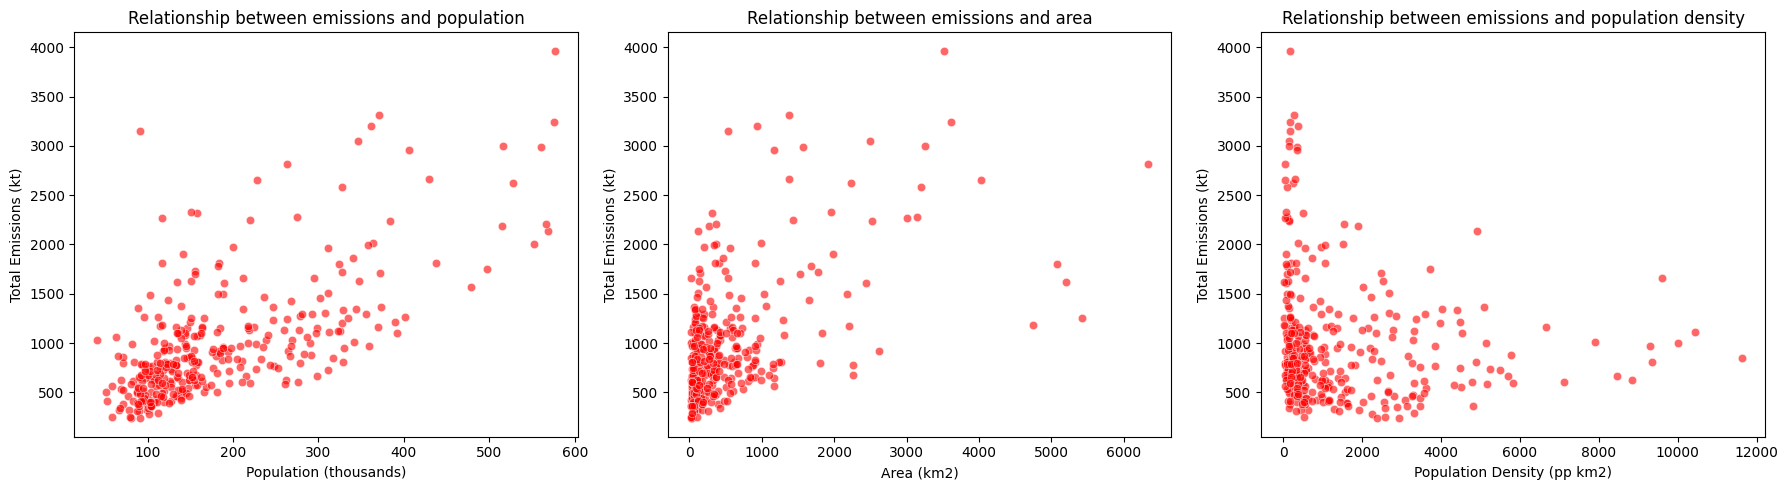

In [ ]:
# Scatter plots showing the relationship between emissions and population, area, and population density,
# with outliers removed
Obj4Fig5()

In [ ]:
# Table showing the results of Spearman rank correlation test for emissions against population, area, and pop density
Obj4_table6

Variable 1                           Variable 2  \
0  Total_GHG_emissions_kt      Mid-year Population (thousands)   
1  Total_GHG_emissions_kt                           Area (km2)   
2  Total_GHG_emissions_kt  Population Density - person per km2   

   Correlation Coefficient       p-value  
0                 0.666015  8.196292e-45  
1                 0.470171  4.780893e-20  
2                -0.205977  1.337418e-04

# Conclusion

## Achievements

In 2022, Northern Ireland had the highest average local authority GHG emissions of any country, and the second highest of any region, likely due to agriculture dominating 75% of its land use. Contrastingly, England had the lowest average emissions, with the lowest emitting regions being South East, East of England and London. London’s low emissions may be explained by its high population density, extensive urban transport system and the lack of industry and agriculture in the region.

There was a significant disparity between the average local authorities' GHG emissions and the top 5 emitting local authorities in each sector, especially in local authorities which are high polluters in industry. This may be due to the geographic concentration of manufacturing in specific areas in the UK.  

The top GHG contributing sectors were Transport and Domestic, potentially driven fossil fuel reliance, heating and energy use. LULUCF contributed the least, as forests often act as carbon sinks. Regional emissions varied significantly, with South East having very high outputs in Transport and Domestic, contrasting with Northern Ireland’s very low emissions overall. This reflects differences in population density and economic activity. Addressing GHG emissions requires very tailored strategies that must consider region and sector-specific factors.

Whilst population and area are positively associated with emissions, population density is negatively associated with emissions, with densely populated areas like London emitting less overall, consistent with previous findings.


## Limitations

Combining the three types of emissions (CO2, NO2, and CH4) into a single GHG variable prevented the ability to differentiate the specific emissions produced by each sector and local authority. For simplicity, sub-sectors were excluded; however, these could be important to analyse for a deeper understanding of variations in emissions across different sectors.

The dataset lacked some context which would have helped understand why some areas emit more than others. Including rural/urban classifications for the local authority areas, or dividing sectors into residential (public sector and domestic) and commercial (agriculture and industry) categories, would have enabled further analysis of which areas contribute the most to emissions in each sector and the reasons why.

## Future Work

Due to time constraints, the analysis focused solely on greenhouse gas emissions from 2022. In future work, the change of emissions over time from 2005 to 2022 could be analysed, using the whole dataset, which could allow prediction of future emissions and trends. Further analysis into how multiple factors jointly influence emissions could help to distinguish the effects of variables such as population, area, population density and dominant sector.

Regional variations could be examined in more detail, considering elements such as local infrastructure and economic activities, to develop more effective and efficient strategies.

# Creating a PDF:


Connect the notebook to the Drive file path, and set up the export.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!sudo apt-get install texlive-xetex texlive-fonts-recommended texlive-plain-generic pandoc
!pip install nbconvert

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  dvisvgm fonts-droid-fallback fonts-lato fonts-lmodern fonts-noto-mono
  fonts-texgyre fonts-urw-base35 libapache-pom-java
  libcmark-gfm-extensions0.29.0.gfm.3 libcmark-gfm0.29.0.gfm.3
  libcommons-logging-java libcommons-parent-java libfontbox-java libfontenc1
  libgs9 libgs9-common libidn12 libijs-0.35 libjbig2dec0 libkpathsea6
  libpdfbox-java libptexenc1 libruby3.0 libsynctex2 libteckit0 libtexlua53
  libtexluajit2 libwoff1 libzzip-0-13 lmodern pandoc-data poppler-data
  preview-latex-style rake ruby ruby-net-telnet ruby-rubygems ruby-webrick
  ruby-xmlrpc ruby3.0 rubygems-integration t1utils teckit tex-common tex-gyre
  texlive-base texlive-binaries texlive-latex-base texlive-latex-extra
  texlive-latex-recommended texlive-pictures tipa xfonts-encodings
  xfonts-utils
Suggested packages:
  fonts-noto fonts-freefont-otf | fonts-free

Copy the filepath to the notebook and save the PDF in the same file on Drive.

In [ ]:
!jupyter nbconvert --to pdf "/content/drive/MyDrive/Group Project/coursework2.ipynb"

[NbConvertApp] Converting notebook /content/drive/MyDrive/Group Project/coursework2.ipynb to pdf
[NbConvertApp] Support files will be in coursework2_files/
[NbConvertApp] Making directory ./coursework2_files
[NbConvertApp] Writing 364065 bytes to notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: ['xelatex', 'notebook.tex', '-quiet']
[NbConvertApp] Running bibtex 1 time: ['bibtex', 'notebook']
[NbConvertApp] WARNING | bibtex had problems, most likely because there were no citations
[NbConvertApp] PDF successfully created
[NbConvertApp] Writing 1358896 bytes to /content/drive/MyDrive/Group Project/coursework2.pdf
